# Importing Libraries

In [2]:
import pandas as pd
import heapq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Data Loading

In [3]:
file_path = '/content/Sample Datasets-2 data job posts.csv'
df = pd.read_csv(file_path)

# Data Exploration

### Dataset shape and column names with first few rows of the dataset

In [4]:
print("Dataset shape:", df.shape)
print("Columns available:", df.columns.tolist())
df.head(5)

Dataset shape: (19001, 24)
Columns available: ['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term', 'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location', 'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary', 'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach', 'Year', 'Month', 'IT']


jobpost          date  \
0  AMERIA Investment Consulting Company\r\nJOB TI...   Jan 5, 2004   
1  International Research & Exchanges Board (IREX...   Jan 7, 2004   
2  Caucasus Environmental NGO Network (CENN)\r\nJ...   Jan 7, 2004   
3  Manoff Group\r\nJOB TITLE:  BCC Specialist\r\n...   Jan 7, 2004   
4  Yerevan Brandy Company\r\nJOB TITLE:  Software...  Jan 10, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                           Company AnnouncementCode Term  \
0             AMERIA Investment Consulting Company              NaN  NaN   
1  International Research & Exchanges Board (IREX)              NaN  NaN   
2        Caucasus Environmental NGO Network (CENN)              NaN  NaN   
3                                     Manoff Group              NaN  NaN   
4                           Yerevan Brandy Company              NaN  NaN   

  Eligibility Audience StartDate                               Duration  ...  \
0         NaN      NaN       NaN                                    NaN  ...   
1         NaN      NaN       NaN                               3 months  ...   
2         NaN      NaN       NaN  Renewable annual contract\r\nPOSITION  ...   
3         NaN      NaN       NaN                                    NaN  ...   
4         NaN      NaN       NaN                                    NaN  ...   

  Salary                                       ApplicationP OpeningDate  \
0    NaN  To apply for this position, please submit a\r\...         NaN   
1    NaN  Please submit a cover letter and resume to:\r\...         NaN   
2    NaN  Please send resume or CV toursula.kazarian@......         NaN   
3    NaN  Please send cover letter and resume to Amy\r\n...         NaN   
4    NaN  Successful candidates should submit\r\n- CV; \...         NaN   

                                        Deadline Notes  \
0                                26 January 2004   NaN   
1                                12 January 2004   NaN   
2  20 January 2004\r\nSTART DATE:  February 2004   NaN   
3      23 January 2004\r\nSTART DATE:  Immediate   NaN   
4                         20 January 2004, 18:00   NaN   

                                              AboutC Attach  Year Month     IT  
0                                                NaN    NaN  2004     1  False  
1  The International Research & Exchanges Board (...    NaN  2004     1  False  
2  The Caucasus Environmental NGO Network is a\r\...    NaN  2004     1  False  
3                                                NaN    NaN  2004     1  False  
4                                                NaN    NaN  2004     1   True  

[5 rows x 24 columns]

### Data types

In [5]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

Dataset Shape: (19001, 24)

Data Types:
 jobpost             object
date                object
Title               object
Company             object
AnnouncementCode    object
Term                object
Eligibility         object
Audience            object
StartDate           object
Duration            object
Location            object
JobDescription      object
JobRequirment       object
RequiredQual        object
Salary              object
ApplicationP        object
OpeningDate         object
Deadline            object
Notes               object
AboutC              object
Attach              object
Year                 int64
Month                int64
IT                    bool
dtype: object


### Checking for missing values

In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\nMissing Values Per Column:\n", missing_values)


Missing Values Per Column:
 Audience            18361
AnnouncementCode    17793
Attach              17442
Notes               16790
Eligibility         14071
Term                11325
Salary               9379
StartDate            9326
Duration             8203
AboutC               6531
JobDescription       3892
JobRequirment        2522
OpeningDate           706
RequiredQual          484
Deadline               65
ApplicationP           60
Location               32
Title                  28
Company                 7
jobpost                 0
date                    0
Year                    0
Month                   0
IT                      0
dtype: int64


### Plot: Missing Values Bar Chart

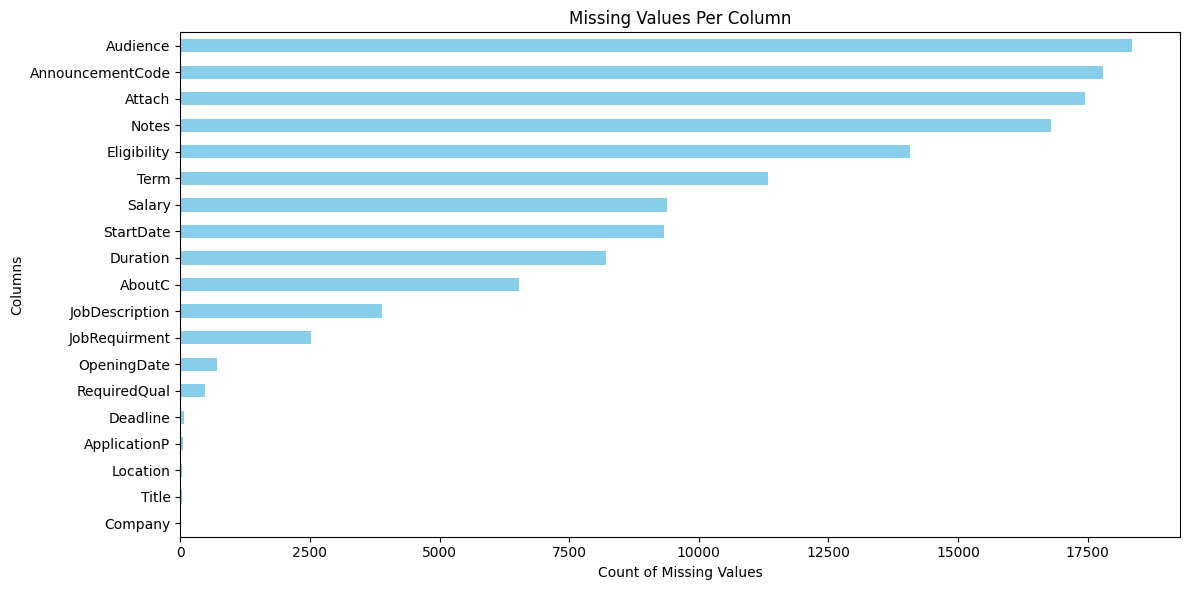

In [7]:
plt.figure(figsize=(12, 6))
missing_values[missing_values > 0].plot(kind='barh', color='skyblue')
plt.title("Missing Values Per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Percentage of missing values for each column

In [8]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values per Column:")
print(missing_percentage)


Percentage of Missing Values per Column:
jobpost              0.000000
date                 0.000000
Title                0.147361
Company              0.036840
AnnouncementCode    93.642440
Term                59.602126
Eligibility         74.053997
Audience            96.631756
StartDate           49.081627
Duration            43.171412
Location             0.168412
JobDescription      20.483132
JobRequirment       13.272986
RequiredQual         2.547234
Salary              49.360560
ApplicationP         0.315773
OpeningDate          3.715594
Deadline             0.342087
Notes               88.363770
AboutC              34.371875
Attach              91.795169
Year                 0.000000
Month                0.000000
IT                   0.000000
dtype: float64


*In some of the rows the `jobpost` column includes information related to job location, job responsibilities, job description, eligibility, application procedures, required qualifications, job titles, salary or remuneration, which are separate columns in the dataset.*

### Distribution of IT vs Non-IT Jobs

In [9]:
print("\nIT Job Distribution:\n", df['IT'].value_counts())


IT Job Distribution:
 IT
False    15242
True      3759
Name: count, dtype: int64


### Plot: IT Job Distribution

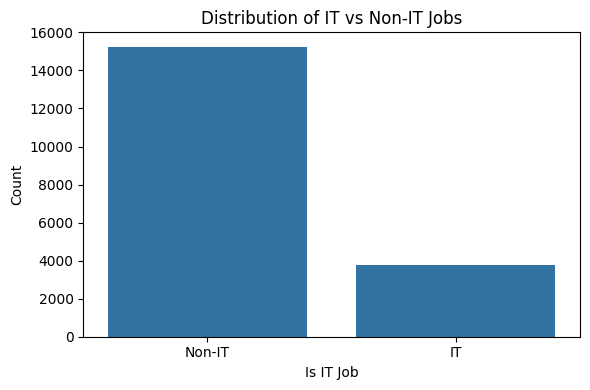

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='IT')
plt.title("Distribution of IT vs Non-IT Jobs")
plt.xlabel("Is IT Job")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-IT', 'IT'])
plt.tight_layout()
plt.show()

### Check for Duplicate Rows

In [11]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows in the dataset: {duplicate_count}")


Number of duplicate rows in the dataset: 39


### Remove duplicate rows and update the DataFrame

In [12]:
df_cleaned = df.drop_duplicates()

print("Original number of rows:", len(df))
print("Number of rows after duplicate removal:", len(df_cleaned))

duplicate_count = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows in the dataset: {duplicate_count}")

Original number of rows: 19001
Number of rows after duplicate removal: 18962

Number of duplicate rows in the dataset: 0


### Unique Values

In [13]:
print("\nUnique Value Counts:\n", df[['Title', 'Company', 'Location', 'Year', 'IT']].nunique())


Unique Value Counts:
 Title       8636
Company     4554
Location     759
Year          12
IT             2
dtype: int64


### Explore Unique Values in Key Columns

In [14]:
key_columns = ['Title', 'Company', 'Location']
for col in key_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'Title':
['Chief Financial Officer'
 'Full-time Community Connections Intern (paid internship)'
 'Country Coordinator' ... 'Category Development Manager'
 'Operational Marketing Manager' 'Head of Online Sales Department']

Unique values in 'Company':
['AMERIA Investment Consulting Company'
 'International Research & Exchanges Board (IREX)'
 'Caucasus Environmental NGO Network (CENN)' ... '"HayTech Solutions" LLC'
 'NASDAQ OMX Armenia OJSC' 'Technolinguistics NGO']

Unique values in 'Location':
['Yerevan, Armenia'
 'IREX Armenia Main Office; Yerevan, Armenia \r\nDESCRIPTION:   IREX currently seeks to fill the position of a paid\r\nIntern for the Community Connections (CC) Program. The position is based\r\nin the Yerevan office however applicants must be willing to travel\r\nthroughout Armenia as necessary.  This position reports directly to the\r\nCC Program Manager.\r\nRESPONSIBILITIES:  \r\n- Presenting the CC program to interested parties; \r\n- Assisting in plannin

### Top 10 Most Common Job Titles

In [15]:
print("\nTop 10 Job Titles:\n", df['Title'].value_counts().head(10))


Top 10 Job Titles:
 Title
Accountant                  328
Chief Accountant            219
Medical Representative      216
Sales Manager               166
Administrative Assistant    155
Lawyer                      151
Software Developer          134
Project Manager             117
English Language Courses    109
Web Developer               101
Name: count, dtype: int64


### Job Postings by Year

In [16]:
print("\nJob Postings by Year:\n", df['Year'].value_counts().sort_index())


Job Postings by Year:
 Year
2004     875
2005    1138
2006    1116
2007    1538
2008    1785
2009    1191
2010    1511
2011    1697
2012    2149
2013    2009
2014    1983
2015    2009
Name: count, dtype: int64


### Plot: Job Postings by Year

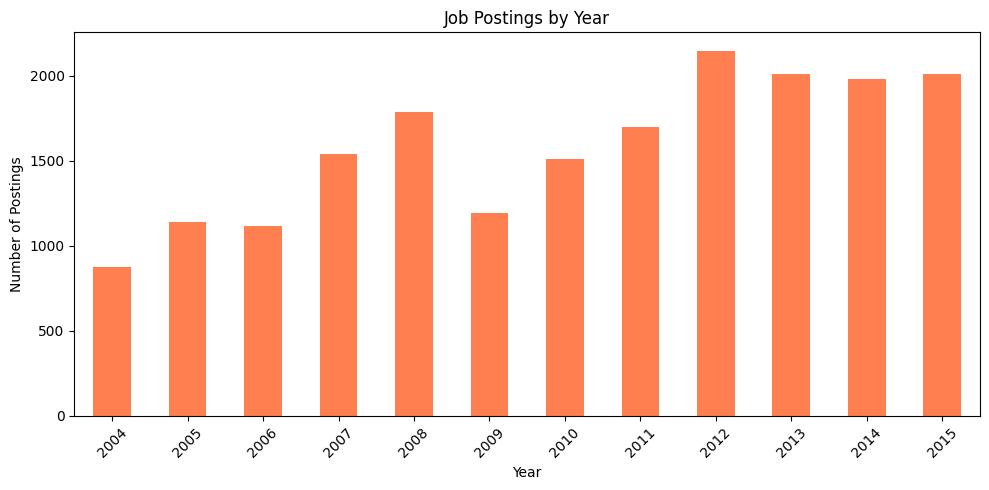

In [17]:
plt.figure(figsize=(10, 5))
df['Year'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title("Job Postings by Year")
plt.xlabel("Year")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### IT Vs Non-IT Job Trends Over Time

<Figure size 1200x600 with 0 Axes>

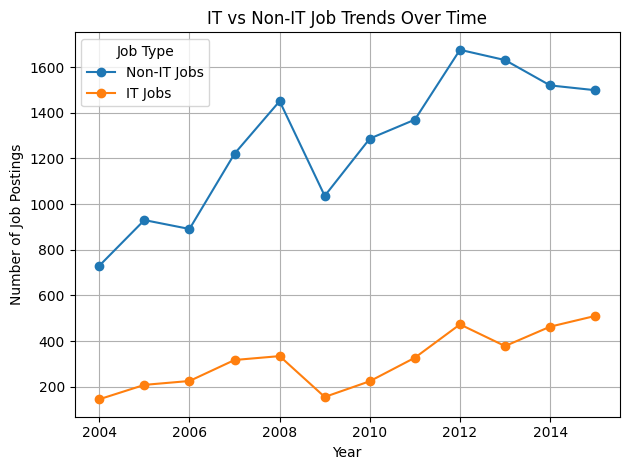

In [18]:
# Grouping by Year and IT status to count jobs
it_trends = df.groupby(['Year', 'IT']).size().unstack(fill_value=0)

# Plotting the trend over time
plt.figure(figsize=(12, 6))
it_trends.plot(kind='line', marker='o')
plt.title("IT vs Non-IT Job Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Job Postings")
plt.legend(["Non-IT Jobs", "IT Jobs"], title="Job Type")
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribution of Job Titles

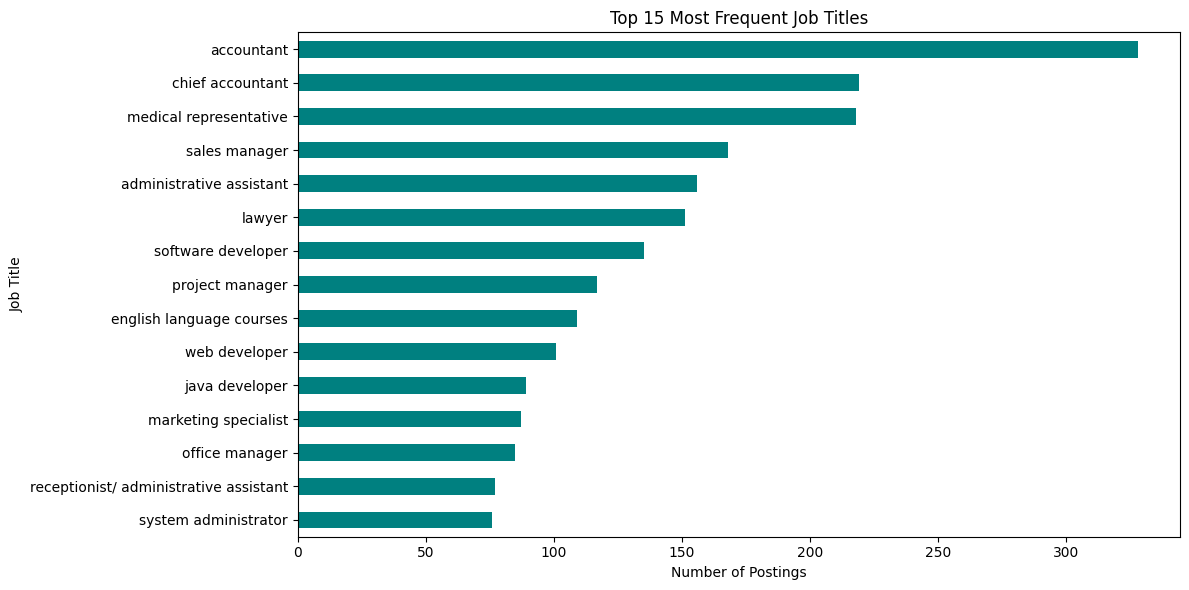

In [19]:
# Clean job titles: drop missing values, strip spaces, and convert to lowercase
clean_titles = df['Title'].dropna().str.strip().str.lower()

# Get the top 15 most common job titles
title_counts = clean_titles.value_counts().head(15)

# Plot the distribution of job titles
plt.figure(figsize=(12, 6))
title_counts.plot(kind='barh', color='teal')
plt.title("Top 15 Most Frequent Job Titles")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.gca().invert_yaxis()  # Most frequent at the top
plt.tight_layout()
plt.show()

### Top 30 Keywords In Job Posts

<ipython-input-20-914a9ed63032>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['combined_text'] = (
<ipython-input-20-914a9ed63032>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_text'] = df_cleaned['combined_text'].apply(clean_text)


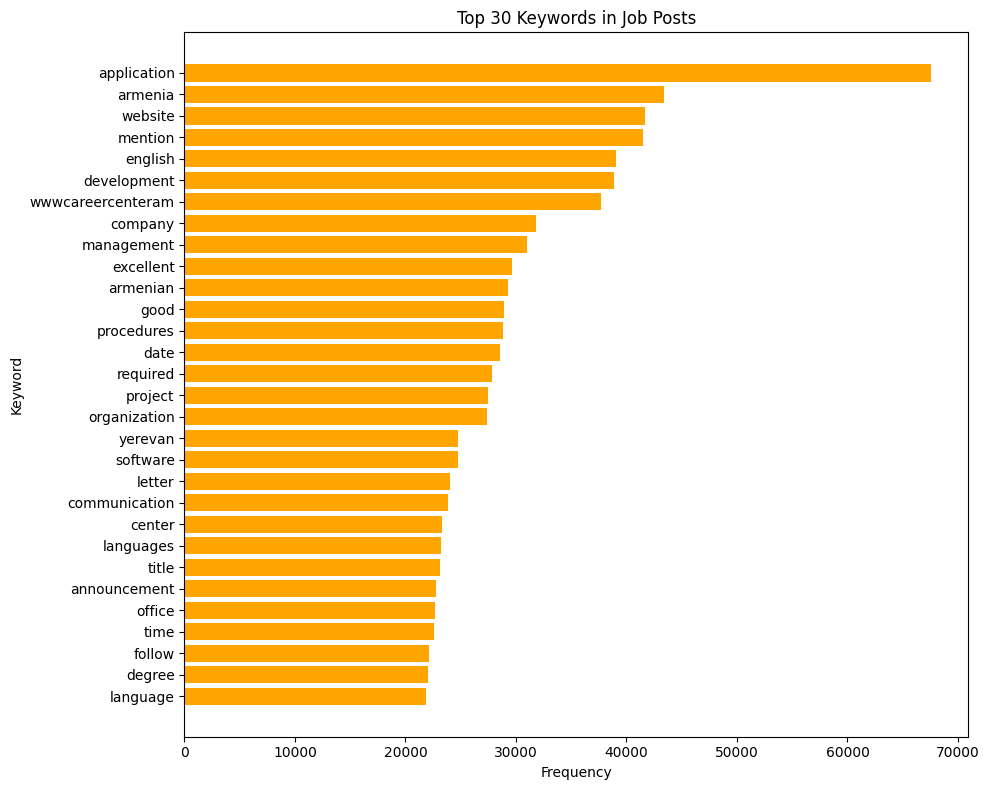

In [20]:
# Combine and clean text from relevant columns
df_cleaned['combined_text'] = (
    df_cleaned['Title'].fillna('') + ' ' +
    df_cleaned['JobRequirment'].fillna('') + ' ' +
    df_cleaned['RequiredQual'].fillna('') + ' ' +
    df_cleaned['jobpost'].fillna('')
)

# Text cleaning function
def clean_text(text):
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove punctuation/numbers
    return text.lower()

df_cleaned['cleaned_text'] = df_cleaned['combined_text'].apply(clean_text)

# Define custom stopwords
custom_stopwords = list(text.ENGLISH_STOP_WORDS.union([
    'experience', 'skills', 'knowledge', 'years', 'position',
    'ability', 'including', 'related', 'job', 'work', 'team'
]))

# Use CountVectorizer to get top keywords
vectorizer = CountVectorizer(stop_words=custom_stopwords, max_features=30)
X = vectorizer.fit_transform(df_cleaned['cleaned_text'])

# Get keyword frequencies
keywords = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Create a DataFrame for visualization
keyword_freq_df = pd.DataFrame({'Keyword': keywords, 'Frequency': frequencies})
keyword_freq_df = keyword_freq_df.sort_values(by='Frequency', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(keyword_freq_df['Keyword'], keyword_freq_df['Frequency'], color='orange')
plt.title("Top 30 Keywords in Job Posts")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()

### Top 15 Companies Posting IT Jobs


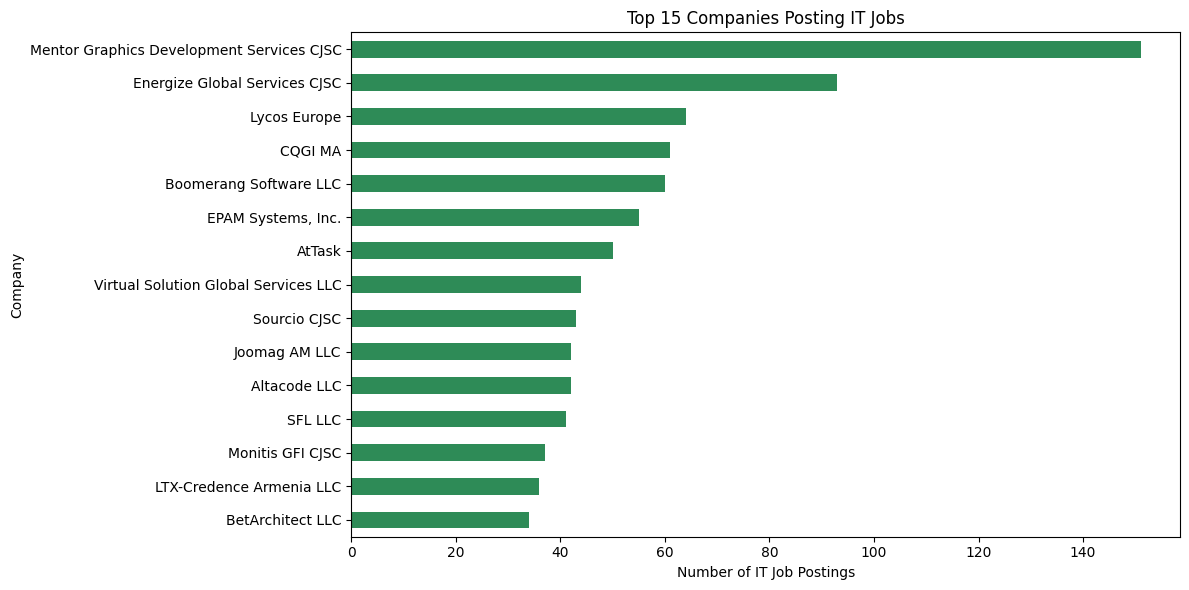

In [21]:
# Filter only IT-related job postings
it_jobs = df[df['IT'] == True]

# Count IT job postings by company
top_it_companies = it_jobs['Company'].dropna().str.strip().value_counts().head(15)

# Plotting the top companies posting IT jobs
plt.figure(figsize=(12, 6))
top_it_companies.plot(kind='barh', color='seagreen')
plt.title("Top 15 Companies Posting IT Jobs")
plt.xlabel("Number of IT Job Postings")
plt.ylabel("Company")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Jobs mentioning Python, AI explicitly

In [22]:
# Search for 'Python' keyword in combined job text (case-insensitive)
python_jobs = df[df['jobpost'].str.contains(r'\bpython\b', case=False, na=False)]
AI_jobs = df[df['jobpost'].str.contains(r'\bAI\b', case=False, na=False)]

# Count of jobs mentioning Python
python_job_count = len(python_jobs)
AI_job_count = len(AI_jobs)

print("Jobs that mention Python explicitely:", python_job_count)
print("Jobs that mention AI explicitely:", AI_job_count)

Jobs that mention Python explicitely: 218
Jobs that mention AI explicitely: 2


## Descriptive Statistics

### For numeric columns

In [23]:
print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())


Descriptive Statistics for Numeric Columns:
               Year         Month
count  19001.000000  19001.000000
mean    2010.274722      6.493869
std        3.315609      3.405503
min     2004.000000      1.000000
25%     2008.000000      3.000000
50%     2011.000000      7.000000
75%     2013.000000      9.000000
max     2015.000000     12.000000


### For object (text) columns

In [24]:
print("\nDescriptive Statistics for Object Columns:")
print(df.describe(include='object'))


Descriptive Statistics for Object Columns:
                                                  jobpost         date  \
count                                               19001        19001   
unique                                              18892         4391   
top     Career Center NGO\r\nTITLE:  English Language ...  May 6, 2014   
freq                                                   11           24   

             Title        Company AnnouncementCode       Term  \
count        18973          18994             1208       7676   
unique        8636           4554             1014        411   
top     Accountant  ArmenTel CJSC        IOS - 001  Full time   
freq           328            353                9       5348   

                     Eligibility                   Audience StartDate  \
count                       4930                        640      9675   
unique                       663                        216      1186   
top     All qualified candidates  All in

In [25]:
df = df_cleaned

In [26]:
print("Original number of rows:", len(df))

Original number of rows: 18962


# Search for AI-Related Job Postings Using Greedy Best-First Search

In [27]:
# Define AI-related keywords
ai_keywords = [
    "nlp", "natural language processing", "software developer", "software engineer",
    "artificial intelligence", "machine learning", "deep learning", "data science",
    "neural networks", "python", "computer vision", "ai", "ml", "dl"
]

# Preprocess text for case-insensitive comparison
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    return text.lower()


# Heuristic: count how many keywords are found in the job text
def heuristic(text):
    text = preprocess_text(text)
    return sum(1 for kw in ai_keywords if kw in text)

# Greedy Best-First Search to find top AI-related jobs
def greedy_best_first_search(df, text_columns, top_n=50):
    heap = []
    for index, row in df.iterrows():
        combined_text = " ".join(str(row[col]) for col in text_columns if pd.notnull(row[col]))
        score = heuristic(combined_text)
        if score > 0:
            heapq.heappush(heap, (-score, index))  # Max-heap using negative score

    top_indices = [idx for _, idx in heapq.nsmallest(top_n, heap)]
    return df.loc[top_indices].reset_index(drop=True)

# Choose which columns to search through
text_columns = ["jobpost", "Title", "JobDescription", "JobRequirment", "RequiredQual"]

# Apply search algorithm
ai_jobs_df = greedy_best_first_search(df, text_columns)

# Analysis & Insights Extraction

### Extract Relevant Information (Title, Company, Required Skills, Qualifications)

In [28]:
# Select only important columns for analysis
selected_columns = [
    "Title", "Company", "Location", "JobDescription",
    "JobRequirment", "RequiredQual", "ApplicationP", "IT"
]

ai_jobs_summary_df = ai_jobs_df[selected_columns]

# Display total number of matched AI-related jobs
print(f"\n Number of AI-related job postings found: {len(ai_jobs_summary_df)}")

# Show the first few rows as a summary
print("\n Summary of AI-Related Job Postings:")
display(ai_jobs_summary_df.head(10))  # Change number as needed


 Number of AI-related job postings found: 50

 Summary of AI-Related Job Postings:


Title                Company  \
0  Senior Software Developer (several positions)              ZenteX.AM   
1                Quality Assurance Group Manager            UNICAD CJSC   
2              Quality Assurance Senior Engineer            UNICAD CJSC   
3                     Quality Assurance Engineer            UNICAD CJSC   
4                             Software Developer                 Zenteq   
5         Engineer, Quality Assurance Department                 UniCAD   
6  Engineer, Configuration Management Department                 UniCAD   
7                                 Sales Engineer              Zenteq.am   
8                      Software Engineers - Java            Impeva Labs   
9                             Software Developer  Firmplace Corporation   

           Location                                     JobDescription  \
0  Yerevan, Armenia  ZenteX.AM is seeking software developers to fi...   
1  Yerevan, Armenia  The individual will be responsible for design,...   
2  Yerevan, Armenia  The individual will be responsible for design,...   
3  Yerevan, Armenia  The individual will be responsible for design,...   
4  Yerevan, Armenia  The position assumes participation in the full...   
5  Yerevan, Armenia  Quality Assurance Department Engineer will be\...   
6  Yerevan, Armenia  Configuration Management Department Engineer w...   
7  Yerevan, Armenia                                                NaN   
8  Yerevan, Armenia  Impeva Labs is looking for highly qualified an...   
9  Yerevan, Armenia  The Software Developers will be engaged in Win...   

                                       JobRequirment  \
0  - Designs, develops, implements, tests and wri...   
1  - The individual will be responsible for desig...   
2  Responsible for design, development, applicati...   
3  Responsible for design, development, applicati...   
4  We expect a successful candidate to be able to...   
5  - Design, development, appliance, and maintena...   
6  - Development and maintenance of the automated...   
7  Client Engagements\r\n- Listen to customers an...   
8  - Leverage his/ her knowledge in software desi...   
9  - Work as a part of team on Web and Windows ap...   

                                        RequiredQual  \
0  We expect a successful candidate to be able to...   
1  - Must have BS/MS/PhD in CS/EE.\r\n- Preferred...   
2  - Must have BS/MS/PhD in CS/EE.\r\n- Preferred...   
3  Must have BS/MS in CS/EE.\r\nSKILLS/KNOWLEDGE:...   
4  Applicants should have exposure to and\r\nprev...   
5  - Bachelor or Master of Science (Computer scie...   
6  - Bachelor or Master of Science (Computer scie...   
7  - Bachelors degree in Computer Science or rela...   
8  - BS in Computer Sciences. MS or PhD is prefer...   
9  - BS or MS in Computer Science or related fiel...   

                                        ApplicationP     IT  
0  Send cover letter and CV in Plain text or PDF\...   True  
1  Send a cover letter and CV in Plain text, MS\r...  False  
2  Send a cover letter and CV in Plain text, MS\r...  False  
3  Send a cover letter and CV in Plain text, MS\r...   True  
4  Send your cover letter and curriculum vitae to...   True  
5  Please, send your resume and cover letter tojo...  False  
6  Please, send your resume and cover letter tojo...  False  
7  Please send your resume including contact phon...  False  
8  Interested candidates should e-mail their\r\nd...   True  
9  All interested candidates should submit their\...   True

# Analysis & Insights Extraction

In [29]:
# Count how many AI-related posts come from each company.
company_counts = ai_jobs_df['Company'].value_counts()
print("\nJob Post Counts by Company in AI-Related Roles:")
print(company_counts)


Job Post Counts by Company in AI-Related Roles:
Company
Ogma Applications CJSC                              6
Netsoft-USA Yerevan Office                          4
UNICAD CJSC                                         4
VXSoft Ltd                                          3
Ogma Applications                                   2
Firmplace Corporation                               2
UniCAD                                              2
K-Telecom CJSC (VivaCell-MTS)                       2
Imagenomic LLC                                      2
Synergy International Systems, Inc. - Armenia       2
Smart Systems LLC                                   1
Impeva Labs                                         1
Zenteq.am                                           1
Zenteq                                              1
ZenteX.AM                                           1
Alikhanyan National Scientific Laboratory (ANSL)    1
SFL LLC                                             1
Innova Systems           

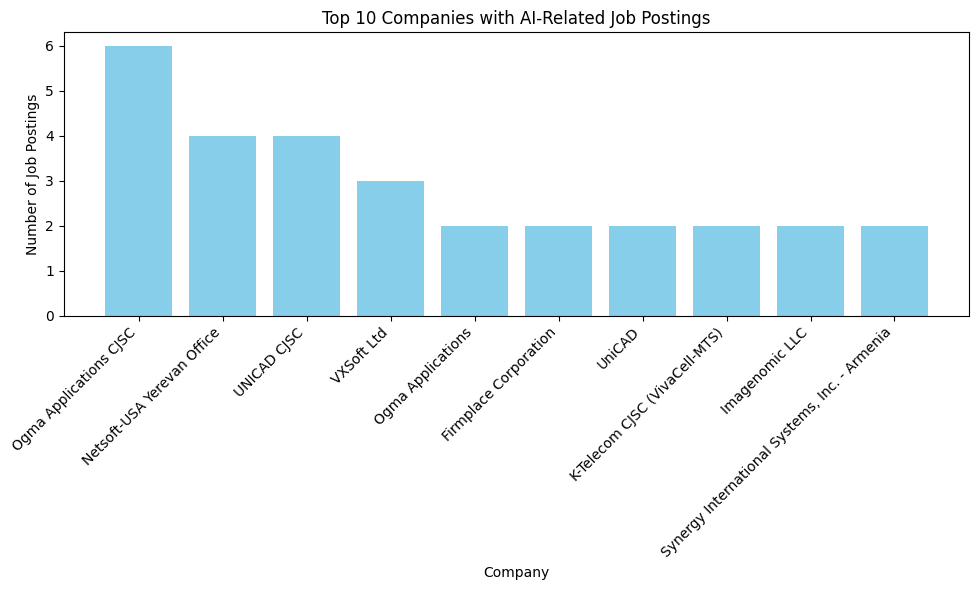

In [30]:


# Count AI-related posts by company (assuming you have ai_jobs_df)
company_counts = ai_jobs_df['Company'].value_counts()

# Select the top N companies for visualization (e.g., top 10)
top_n = 10  # You can adjust this
top_companies = company_counts.head(top_n)

# Create the bar chart using matplotlib.pyplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(top_companies.index, top_companies.values, color='skyblue')
plt.title(f'Top {top_n} Companies with AI-Related Job Postings')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Optional: Using seaborn for styling
# sns.countplot(y='Company', data=ai_jobs_df, order=company_counts.index[:top_n], color='skyblue')
# plt.title(f'Top {top_n} Companies with AI-Related Job Postings')
# plt.xlabel('Number of Job Postings')
# plt.ylabel('Company')
# plt.tight_layout()
# plt.show()

### Insights from the top-matched AI job postings

In [31]:
# Step 2: Extract insights - common titles, companies, locations, and qualification patterns
top_titles = ai_jobs_df["Title"].value_counts().head(5)
top_companies = ai_jobs_df["Company"].value_counts().head(5)
top_locations = ai_jobs_df["Location"].value_counts().head(5)

# Collect common phrases from qualifications
all_quals = " ".join(str(q) for q in ai_jobs_df["RequiredQual"] if pd.notnull(q))
qual_phrases = re.split(r"[-•\n\r;:]", all_quals)
qual_cleaned = [q.strip() for q in qual_phrases if len(q.strip()) > 5]
qual_counter = Counter(qual_cleaned).most_common(10)

# Collect common phrases from requirements
all_requirements = " ".join(str(q) for q in ai_jobs_df["JobRequirment"] if pd.notnull(q))
requirement_phrases = re.split(r"[-•\n\r;:]", all_requirements)
requirement_cleaned = [q.strip() for q in requirement_phrases if len(q.strip()) > 5]
requirement_counter = Counter(requirement_cleaned).most_common(10)


# Step 3: Display insights
print("Top Job Titles in AI-related Roles:")
print(top_titles)

print("\nMost Common Qualification Phrases:")
for phrase, count in qual_counter:
    print(f"{phrase} ({count})")

print("\nMost Common Job Requirement Phrases:")
for phrase, count in requirement_counter:
    print(f"{phrase} ({count})")

Top Job Titles in AI-related Roles:
Title
Software Developer           10
Senior Software Engineer      6
Software Engineer             5
Senior Software Developer     2
C++ Software Developer        2
Name: count, dtype: int64

Most Common Qualification Phrases:
methodologies and knowledge of complete product development life cycle (7)
Familiarity with the .NET Framework, specifically the following (7)
packages (7)
messaging, threading, generic collections, custom controls and (7)
Extensive programming experience with standard management and (7)
Thorough understanding of software development processes and (7)
Ability to work under pressure (6)
applications (6)
of ASP.NET (6)
instrumentation API's (6)

Most Common Job Requirement Phrases:
Design, proto (8)
Work with the Senior Architect in the US to get aligned with product (7)
roadmaps and assume a key role in the development of these products (6)
Work with the Quality Assurance team to develop and maintain unit tests (6)
based on pro

### Selecting 3 Jobs based on

- High keyword match score (i.e., relevance to AI).
- Completeness of information – jobs with rich descriptions, requirements, and qualifications.
- Diversity in roles – e.g., not all software developer roles, to show a range of AI applications.



In [32]:
# Score jobs and select top 3 with complete info
def select_top_ai_jobs(df, text_columns, top_n=3):
    scored = []
    for idx, row in df.iterrows():
        text = " ".join(str(row[col]) for col in text_columns if pd.notnull(row[col]))
        score = heuristic(text)
        if pd.notnull(row["JobRequirment"]) and pd.notnull(row["RequiredQual"]):
            scored.append((score, idx))
    # Sort by score descending and get top_n
    top_scored = sorted(scored, key=lambda x: -x[0])[:top_n]
    selected_indices = [idx for _, idx in top_scored]
    return df.loc[selected_indices]

# Select 3 best AI job postings
selected_jobs = select_top_ai_jobs(ai_jobs_df, text_columns)

# Show selected job details
display(selected_jobs[["Title", "Company", "Location", "JobDescription", "JobRequirment", "RequiredQual", "IT"]])

Title      Company  \
0  Senior Software Developer (several positions)    ZenteX.AM   
1                Quality Assurance Group Manager  UNICAD CJSC   
2              Quality Assurance Senior Engineer  UNICAD CJSC   

           Location                                     JobDescription  \
0  Yerevan, Armenia  ZenteX.AM is seeking software developers to fi...   
1  Yerevan, Armenia  The individual will be responsible for design,...   
2  Yerevan, Armenia  The individual will be responsible for design,...   

                                       JobRequirment  \
0  - Designs, develops, implements, tests and wri...   
1  - The individual will be responsible for desig...   
2  Responsible for design, development, applicati...   

                                        RequiredQual     IT  
0  We expect a successful candidate to be able to...   True  
1  - Must have BS/MS/PhD in CS/EE.\r\n- Preferred...  False  
2  - Must have BS/MS/PhD in CS/EE.\r\n- Preferred...  False

### Detailed Display and Insights from the Three Selected Job Ads

In [33]:
# Extract & Compare Required Skills and Qualifications

print("\nDetailed Descriptions of the Three Selected Job Advertisements:")
for i, row in selected_jobs.iterrows():
    print("\n----------------------------------")
    print(f"Title: {row['Title']}")
    print(f"Company: {row['Company']}")
    print(f"Location: {row['Location']}")
    print("Job Description:", row.get("JobDescription", "N/A"))
    print("Required Qualifications:", row.get("RequiredQual", "N/A"))
    print("Application Process:", row.get("ApplicationP", "N/A"))


Detailed Descriptions of the Three Selected Job Advertisements:

----------------------------------
Title: Senior Software Developer (several positions)
Company: ZenteX.AM
Location: Yerevan, Armenia
Job Description: ZenteX.AM is seeking software developers to fill
positions in its expanding development team. The primary directions are
XML, Web Services, information processing and publishing.
Required Qualifications: We expect a successful candidate to be able to
- Design and develop software products;
- Create programs for heterogeneous environments (MS Windows, Unix)
communicating by means of network protocols;
- Author and maintain internal and end-user documentation.
PREFERRED QUALIFICATIONS:  Applicants should have exposure to and
previous experience with
- Programming languages: C, Perl (or Ruby, Python), and Java (or C#);
- Data processing technologies: XML, relational databases.
REMUNERATION:   Competitive
Application Process: Send cover letter and CV in Plain text or PDF
(not 

### Most Frequent Keywords in the Selected Jobs

In [34]:
# Combine all text from selected jobs
text_data = " ".join(
    str(row) for row in selected_jobs[
        ["Title", "JobRequirment", "RequiredQual", "jobpost"]
    ].values.flatten() if pd.notnull(row)
)

# Tokenize and clean text
tokens = word_tokenize(text_data.lower())  # lowercase and tokenize
tokens = [word for word in tokens if word.isalpha()]  # remove punctuation/numbers
filtered_tokens = [
    word for word in tokens if word not in stopwords.words('english')
]

# Count and display top keywords
keyword_freq = Counter(filtered_tokens)
top_keywords = keyword_freq.most_common(20)

# Display results
print("📊 Top 20 Frequent Keywords in Selected AI Jobs:\n")
for word, freq in top_keywords:
    print(f"{word}: {freq}")


📊 Top 20 Frequent Keywords in Selected AI Jobs:

design: 26
knowledge: 24
software: 18
preferred: 18
experience: 18
test: 16
must: 16
job: 15
work: 14
application: 13
etc: 12
data: 11
company: 10
testing: 10
ms: 9
quality: 8
maintaining: 8
scripting: 8
plus: 8
automation: 8


### Top Keywords Matched by Each Selected Job

In [35]:
# Function to count how many AI keywords match in a given text
def keyword_match_counts(text):
    text = preprocess_text(text)
    return {kw: int(kw.lower() in text) for kw in ai_keywords}

# Apply keyword matching to each selected job
for i, row in selected_jobs.iterrows():
    print(f"\n=== Job {i+1}: {row['Title']} at {row['Company']} ===")
    combined_text = " ".join([
        str(row["Title"]),
        str(row["JobRequirment"]),
        str(row["RequiredQual"])
    ])
    matches = keyword_match_counts(combined_text)
    matched_keywords = [kw for kw, found in matches.items() if found]
    print("Matched Keywords:", matched_keywords)


=== Job 1: Senior Software Developer (several positions) at ZenteX.AM ===
Matched Keywords: ['software developer', 'python', 'ai', 'ml']

=== Job 2: Quality Assurance Group Manager at UNICAD CJSC ===
Matched Keywords: ['python', 'ai', 'ml']

=== Job 3: Quality Assurance Senior Engineer at UNICAD CJSC ===
Matched Keywords: ['python', 'ai', 'ml']


### Visualize required skills using word clouds - Convert Text to Word Clouds (Visual Insight)

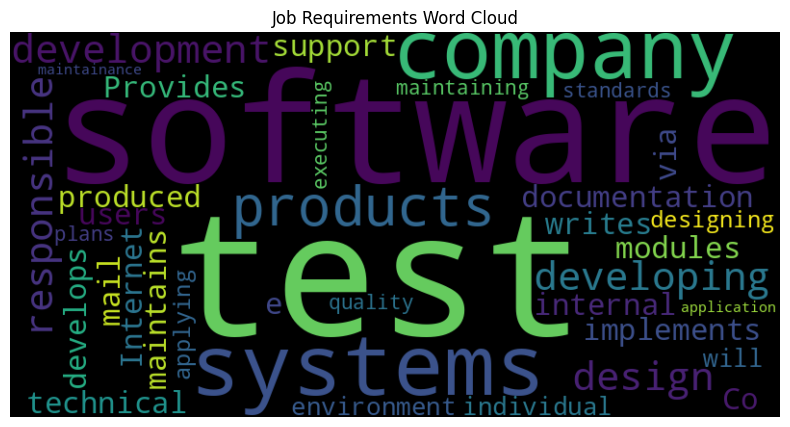

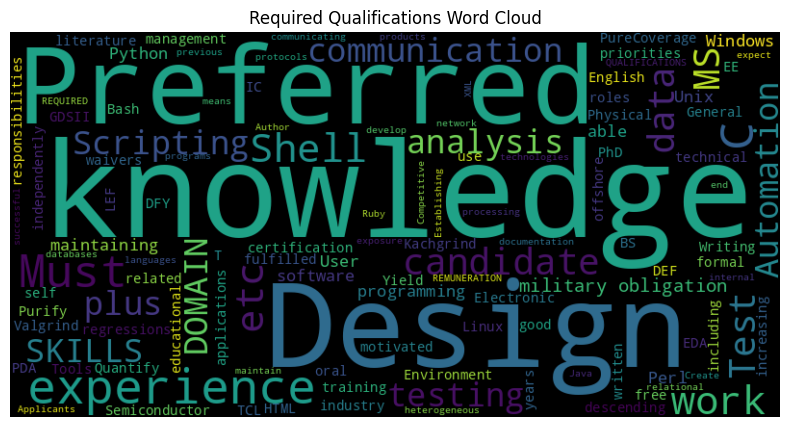

In [36]:
all_requirements = " ".join(selected_jobs["JobRequirment"].dropna())
all_qualifications = " ".join(selected_jobs["RequiredQual"].dropna())

# Word cloud for job requirements
wordcloud_req = WordCloud(width=800, height=400).generate(all_requirements)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_req, interpolation='bilinear')
plt.axis("off")
plt.title("Job Requirements Word Cloud")
plt.show()

# Word cloud for qualifications
wordcloud_qual = WordCloud(width=800, height=400).generate(all_qualifications)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_qual, interpolation='bilinear')
plt.axis("off")
plt.title("Required Qualifications Word Cloud")
plt.show()

### Word Clouds for Job Requirements and Qualifications of each job

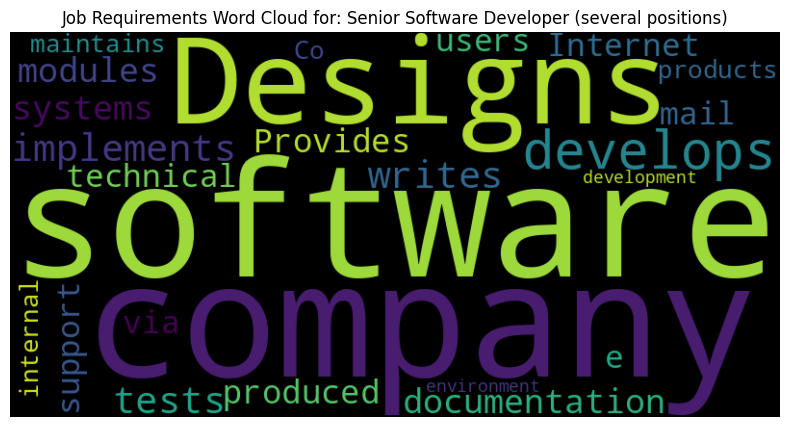

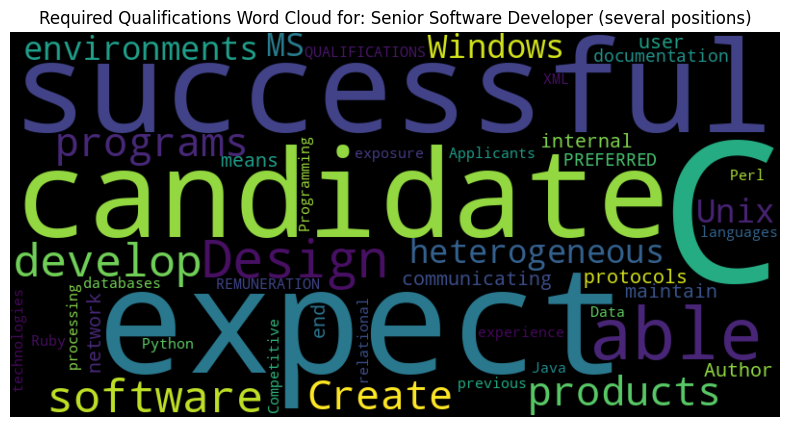

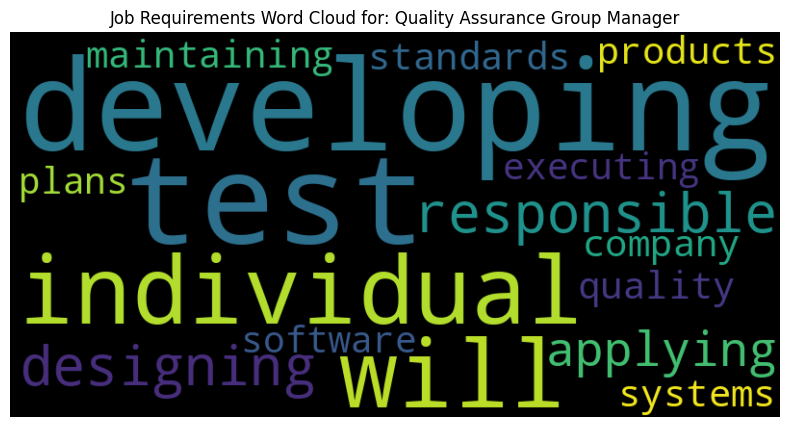

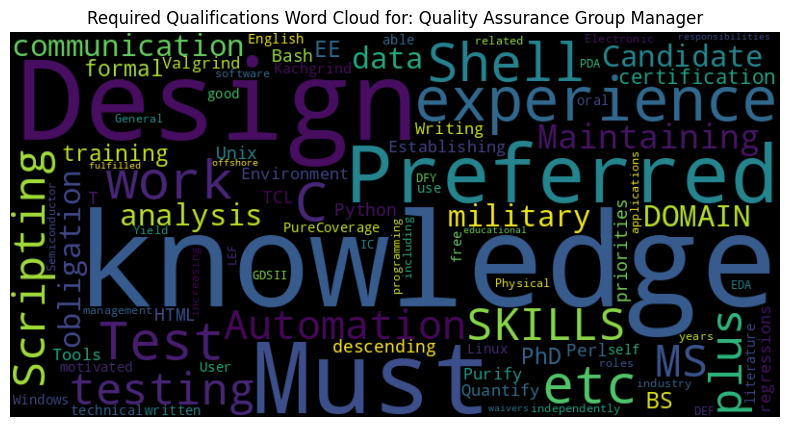

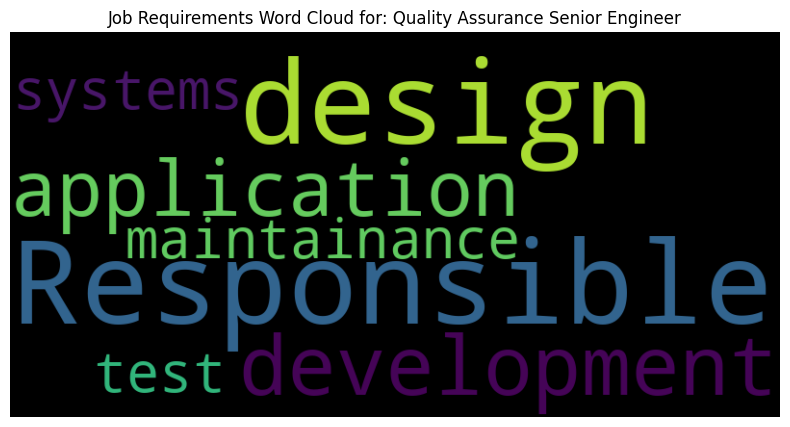

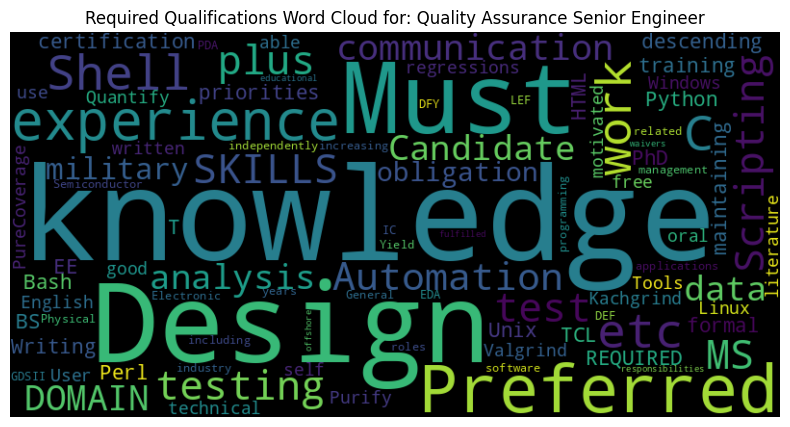

In [37]:
# Iterate through selected jobs and create word clouds
for index, row in selected_jobs.iterrows():
    # Get job title for display
    job_title = row['Title']

    # Generate word cloud for Job Requirements
    if pd.notnull(row['JobRequirment']):
        wordcloud_req = WordCloud(width=800, height=400).generate(str(row['JobRequirment']))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud_req, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Job Requirements Word Cloud for: {job_title}")
        plt.show()
    else:
        print(f"No Job Requirements found for: {job_title}")

    # Generate word cloud for Required Qualifications
    if pd.notnull(row['RequiredQual']):
        wordcloud_qual = WordCloud(width=800, height=400).generate(str(row['RequiredQual']))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud_qual, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Required Qualifications Word Cloud for: {job_title}")
        plt.show()
    else:
        print(f"No Required Qualifications found for: {job_title}")

### Extract & Compare Industry Expectations: Top Job Requirements, Required Qualifications, & Job Responsibilities from the Selected jobs

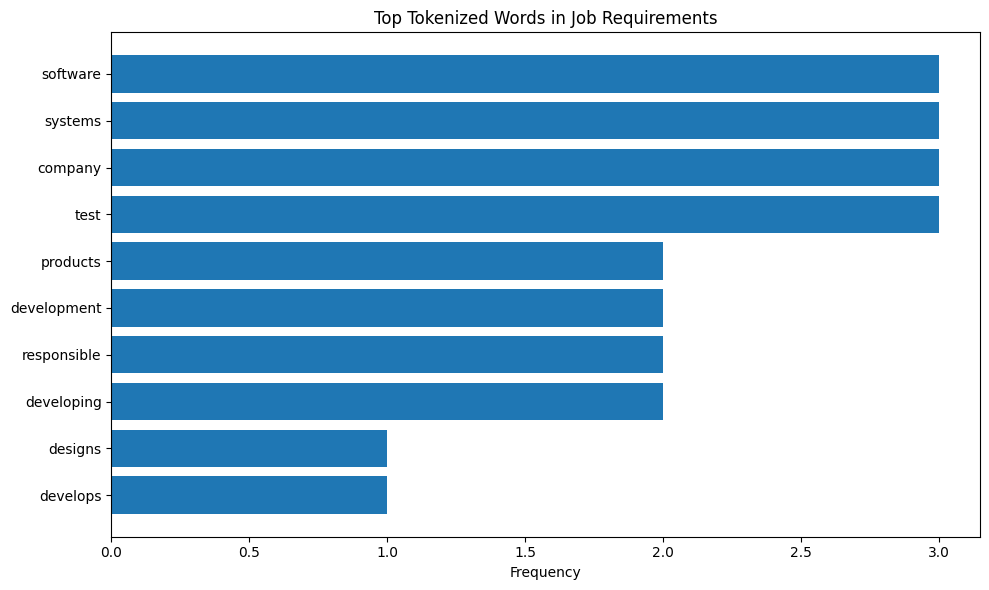

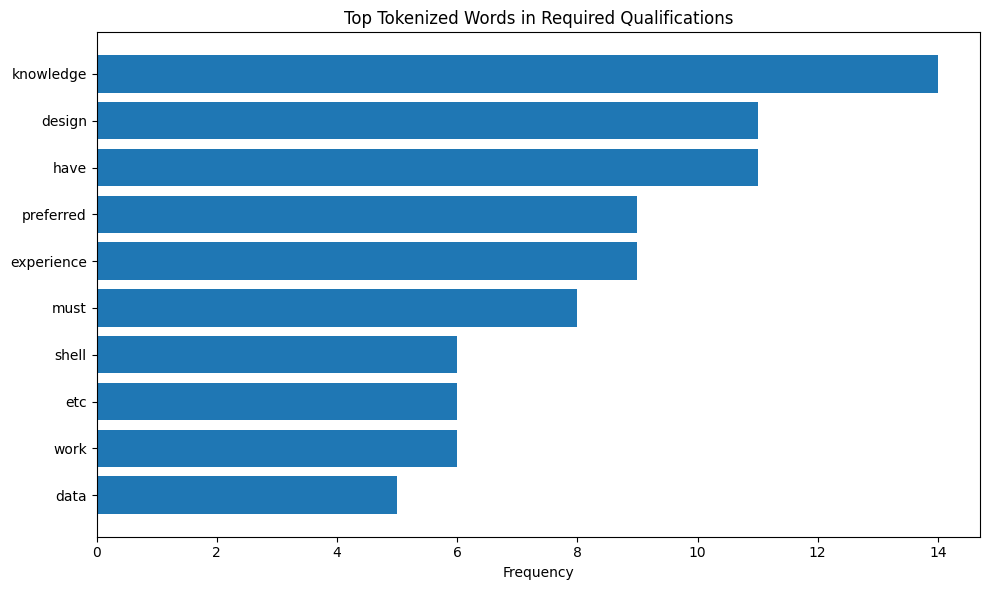

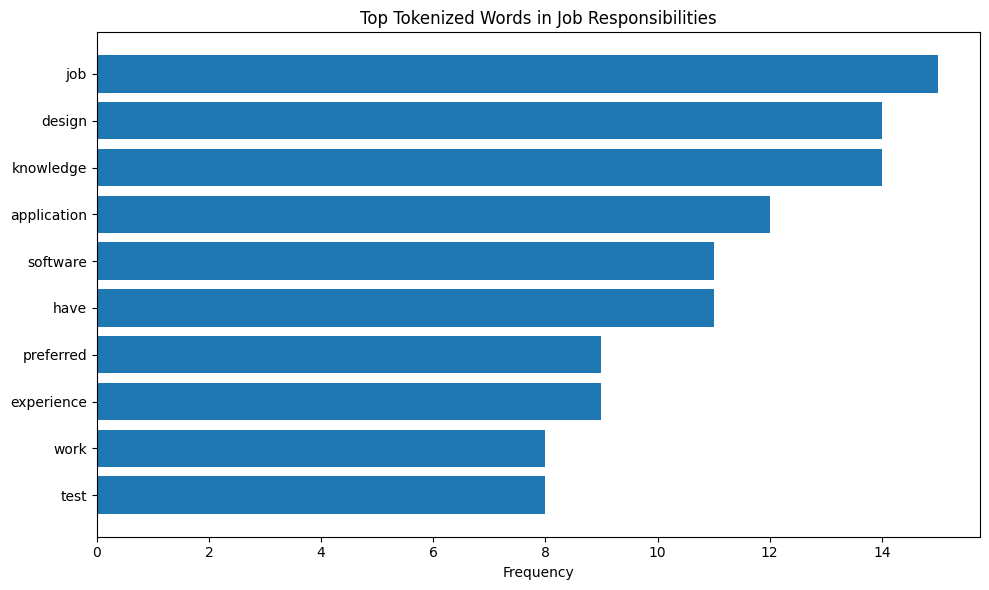

In [38]:
# Simple stopword list
custom_stopwords = {
    "the", "and", "of", "to", "a", "in", "for", "with", "on", "is", "by",
    "as", "be", "at", "or", "an", "from", "are", "this", "that"
}

# Tokenizer and cleaner
def tokenize_text(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return [t for t in tokens if t not in custom_stopwords and len(t) > 2]

# Apply tokenization to selected columns
job_req_tokens = tokenize_text(" ".join(selected_jobs["JobRequirment"].dropna()))
qual_tokens = tokenize_text(" ".join(selected_jobs["RequiredQual"].dropna()))
resp_tokens = tokenize_text(" ".join(selected_jobs["jobpost"].dropna()))

# Count frequencies
req_counts = Counter(job_req_tokens).most_common(10)
qual_counts = Counter(qual_tokens).most_common(10)
resp_counts = Counter(resp_tokens).most_common(10)

# Plotting function
def plot_top_items(items, title):
    labels, values = zip(*items)
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Show results
plot_top_items(req_counts, "Top Tokenized Words in Job Requirements")
plot_top_items(qual_counts, "Top Tokenized Words in Required Qualifications")
plot_top_items(resp_counts, "Top Tokenized Words in Job Responsibilities")


### Top Job Requirements, Required Qualifications, & Job Responsibilities of each Selected jobs

In [39]:
# Simple stopword list
custom_stopwords = {
    "the", "and", "of", "to", "a", "in", "for", "with", "on", "is", "by",
    "as", "be", "at", "or", "an", "from", "are", "this", "that"
}

# Tokenizer and cleaner
def tokenize_text(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return [t for t in tokens if t not in custom_stopwords and len(t) > 2]

# Iterate through selected jobs and tokenize text for each job
for index, row in selected_jobs.iterrows():
    job_title = row['Title']  # Get job title for display

    # Tokenize Job Requirements
    if pd.notnull(row['JobRequirment']):
        job_req_tokens = tokenize_text(str(row['JobRequirment']))
        print(f"\nJob Requirements Tokens for '{job_title}':")
        print(job_req_tokens)
    else:
        print(f"\nNo Job Requirements found for '{job_title}'")

    # Tokenize Required Qualifications
    if pd.notnull(row['RequiredQual']):
        qual_tokens = tokenize_text(str(row['RequiredQual']))
        print(f"\nRequired Qualifications Tokens for '{job_title}':")
        print(qual_tokens)
    else:
        print(f"\nNo Required Qualifications found for '{job_title}'")

    # Tokenize Job Responsibilities (from 'jobpost' column)
    if pd.notnull(row['jobpost']):
        resp_tokens = tokenize_text(str(row['jobpost']))
        print(f"\nJob Responsibilities Tokens for '{job_title}':")
        print(resp_tokens)
    else:
        print(f"\nNo Job Responsibilities found for '{job_title}'")

    print("-" * 50)  # Separator between jobs


Job Requirements Tokens for 'Senior Software Developer (several positions)':
['designs', 'develops', 'implements', 'tests', 'writes', 'documentation', 'software', 'modules', 'systems', 'produced', 'company', 'provides', 'technical', 'support', 'via', 'mail', 'internet', 'users', 'software', 'products', 'maintains', 'company', 'internal', 'development', 'environment']

Required Qualifications Tokens for 'Senior Software Developer (several positions)':
['expect', 'successful', 'candidate', 'able', 'design', 'develop', 'software', 'products', 'create', 'programs', 'heterogeneous', 'environments', 'windows', 'unix', 'communicating', 'means', 'network', 'protocols', 'author', 'maintain', 'internal', 'end', 'user', 'documentation', 'preferred', 'qualifications', 'applicants', 'should', 'have', 'exposure', 'previous', 'experience', 'programming', 'languages', 'perl', 'ruby', 'python', 'java', 'data', 'processing', 'technologies', 'xml', 'relational', 'databases', 'remuneration', 'competitive

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


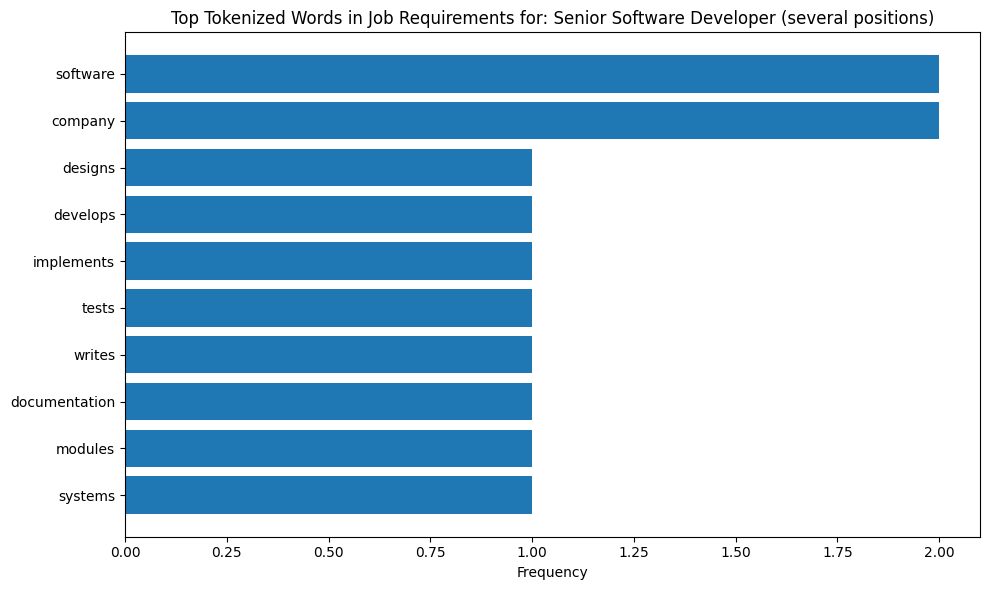

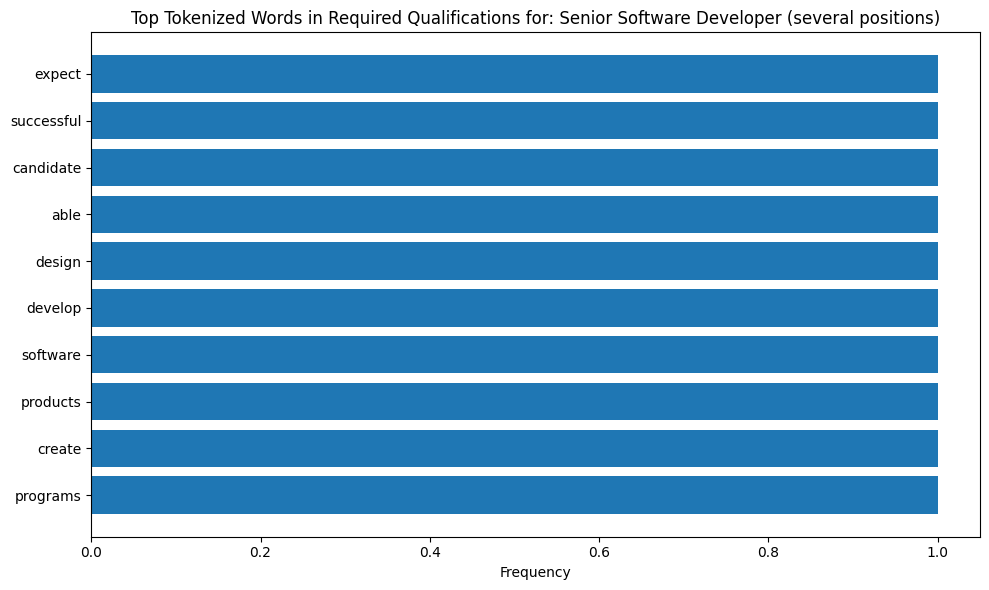

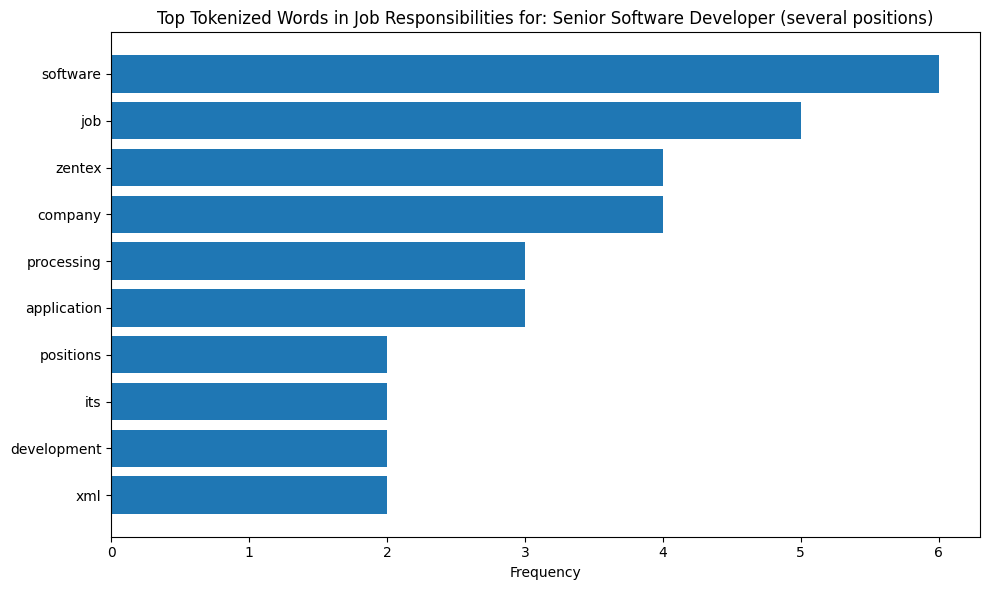

--------------------------------------------------


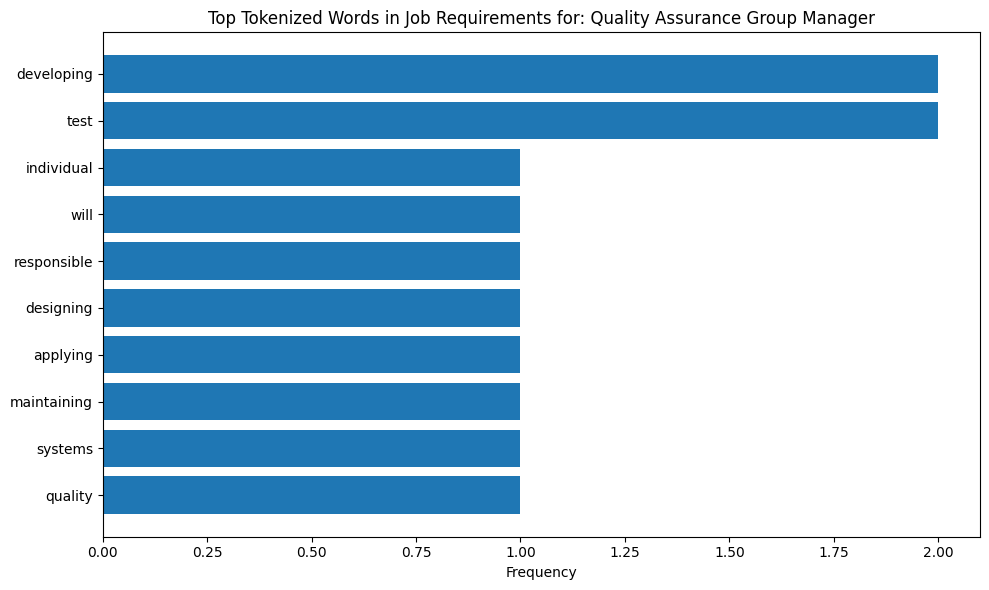

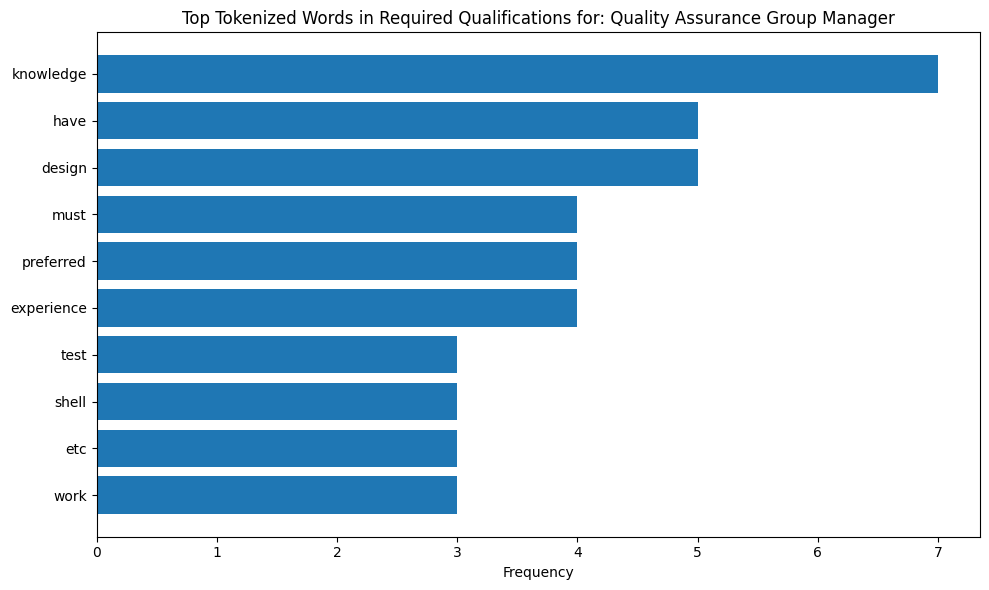

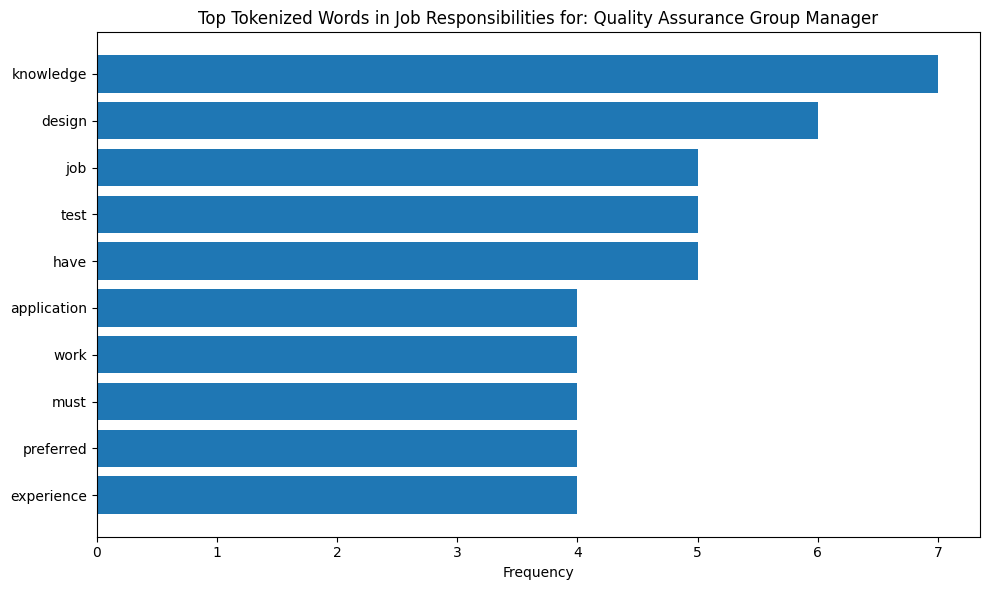

--------------------------------------------------


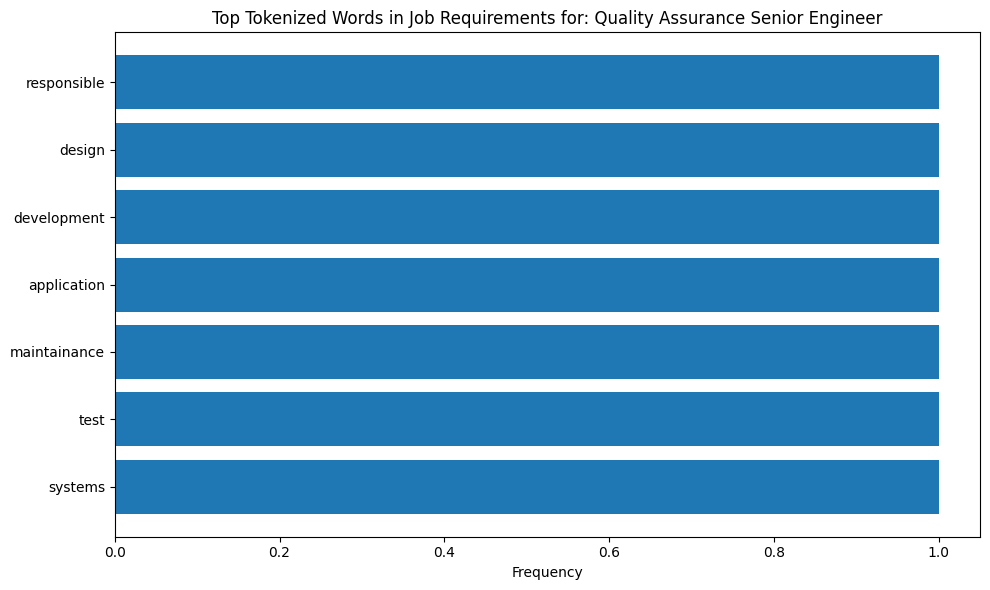

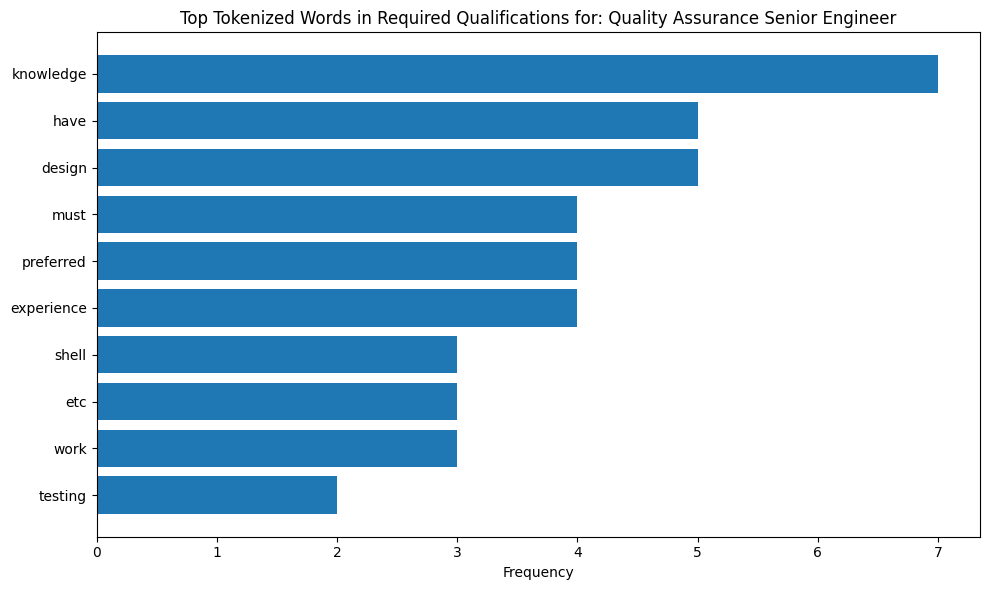

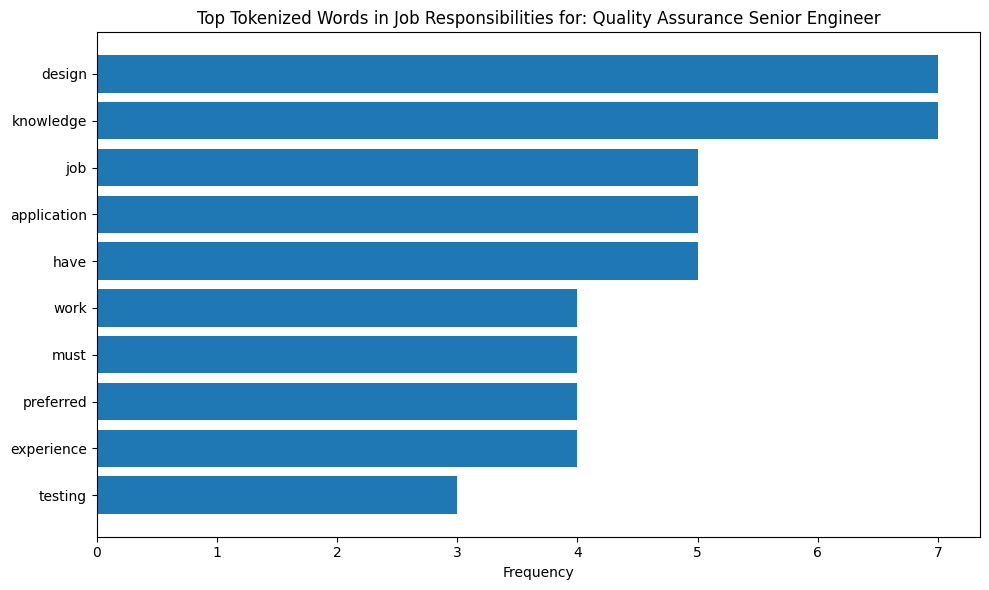

--------------------------------------------------


In [40]:
import nltk
nltk.download('wordnet') # Download wordnet within python

# Simple stopword list
custom_stopwords = {
    "the", "and", "of", "to", "a", "in", "for", "with", "on", "is", "by",
    "as", "be", "at", "or", "an", "from", "are", "this", "that"
}

# Tokenizer and cleaner
def tokenize_text(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return [t for t in tokens if t not in custom_stopwords and len(t) > 2]


def plot_top_items(items, title):
    labels, values = zip(*items)
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Iterate through selected jobs and tokenize text for each job
for index, row in selected_jobs.iterrows():
    job_title = row['Title']  # Get job title for display

    # Tokenize Job Requirements
    if pd.notnull(row['JobRequirment']):
        job_req_tokens = tokenize_text(str(row['JobRequirment']))
        req_counts = Counter(job_req_tokens).most_common(10)
        plot_top_items(req_counts, f"Top Tokenized Words in Job Requirements for: {job_title}")
    else:
        print(f"No Job Requirements found for: {job_title}")

    # Tokenize Required Qualifications
    if pd.notnull(row['RequiredQual']):
        qual_tokens = tokenize_text(str(row['RequiredQual']))
        qual_counts = Counter(qual_tokens).most_common(10)
        plot_top_items(qual_counts, f"Top Tokenized Words in Required Qualifications for: {job_title}")
    else:
        print(f"No Required Qualifications found for: {job_title}")

    # Tokenize Job Responsibilities (from 'jobpost' column)
    if pd.notnull(row['jobpost']):
        resp_tokens = tokenize_text(str(row['jobpost']))
        resp_counts = Counter(resp_tokens).most_common(10)
        plot_top_items(resp_counts, f"Top Tokenized Words in Job Responsibilities for: {job_title}")
    else:
        print(f"No Job Responsibilities found for: {job_title}")

    print("-" * 50)  # Separator between jobs

### Skills Heatmap

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


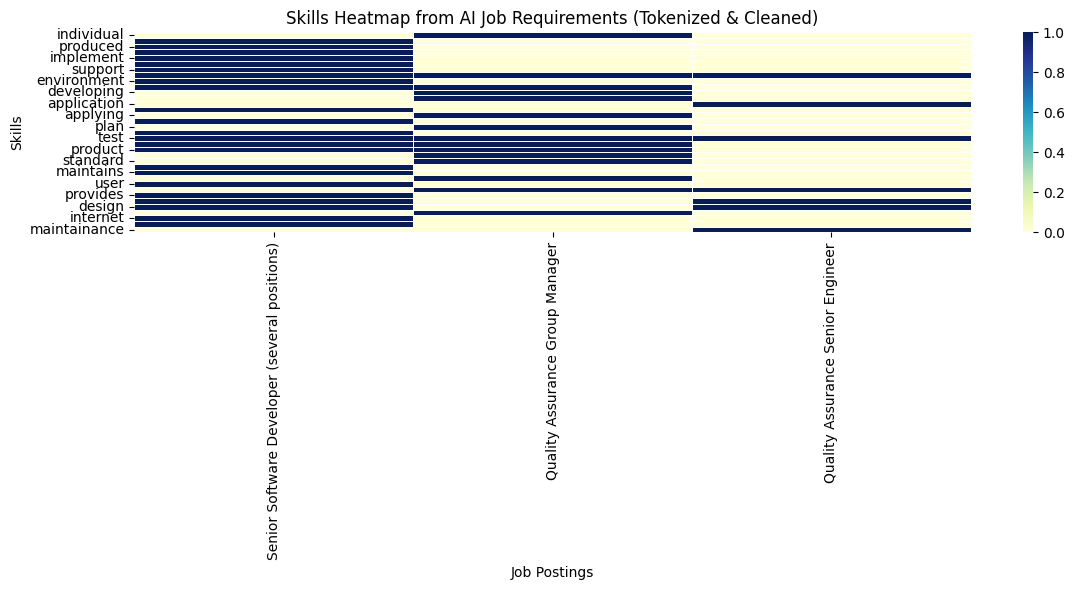

In [41]:
import nltk
nltk.download('wordnet') # Download wordnet within python

# Enhanced tokenizer
def tokenize_text(text):
    tokens = re.findall(r'\b[a-zA-Z][a-zA-Z]+\b', text.lower())
    return tokens


# Extract and tokenize key phrases from a column
def extract_phrases(column_data):
    all_text = " ".join(str(text) for text in column_data if pd.notnull(text))
    phrases = re.split(r"[-•\n\r;:]", all_text)
    cleaned = [p.strip() for p in phrases if len(p.strip()) > 5]

    all_tokens = []
    for phrase in cleaned:
        tokens = tokenize_text(phrase)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]
        all_tokens.extend(tokens)

    return all_tokens


# Build the skill matrix, handling potential empty skill sets
skill_matrix = []
skill_set = set()

for req in selected_jobs["JobRequirment"]:
    skills = extract_phrases([req])  # Pass as list for consistent processing
    skill_matrix.append(skills)
    skill_set.update(skills)

# Convert to list for column reference
skill_list = list(skill_set)

# Create binary matrix, handling potential empty skill sets
matrix = []
for job_skills in skill_matrix:
    row = [1 if skill in job_skills else 0 for skill in skill_list]
    matrix.append(row)

# Build the DataFrame for heatmap, handling potential empty skill sets
if skill_list:  # Proceed if skills were extracted
    heatmap_df = pd.DataFrame(matrix, columns=skill_list)
    heatmap_df.index = selected_jobs["Title"].values

    # Plot the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_df.T, cmap="YlGnBu", cbar=True, linewidths=0.5)
    plt.title("Skills Heatmap from AI Job Requirements (Tokenized & Cleaned)")
    plt.xlabel("Job Postings")
    plt.ylabel("Skills")
    plt.tight_layout()
    plt.show()
else:
    print("No common skills found to create the heatmap.")

### IT trend in the selected Jobs

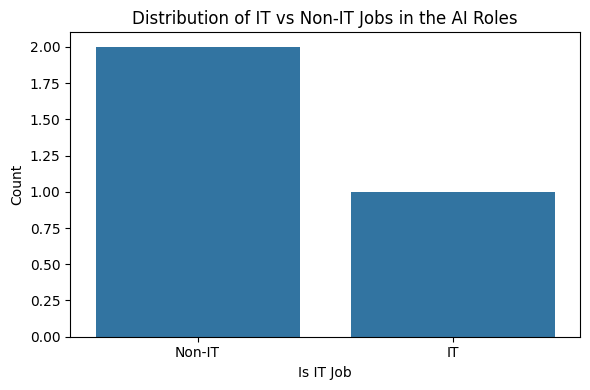

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=selected_jobs, x='IT')
plt.title("Distribution of IT vs Non-IT Jobs in the AI Roles")
plt.xlabel("Is IT Job")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-IT', 'IT'])
plt.tight_layout()
plt.show()

# Reflect on Skills and Identify Gaps

In [43]:
# 1. Your current skills
my_skills = {
    "sql", "html", "php", "java" "communication", "english", "teamwork", "development"
}
my_skills_normalized = {s.lower().strip() for s in my_skills}

# 2. Combine all JobRequirment text
text_data = " ".join(
    str(req) for req in selected_jobs["JobRequirment"] if pd.notnull(req)
)

# 3. Tokenize and clean
tokens = word_tokenize(text_data.lower())
tokens = [word for word in tokens if word.isalpha()]  # keep only words
filtered_tokens = [
    word for word in tokens if word not in stopwords.words('english')
]

# 4. Convert to set of required skill keywords
required_keywords = set(filtered_tokens)

# 5. Compare
matching_skills = my_skills_normalized & required_keywords
missing_skills = required_keywords - my_skills_normalized

# 6. Output
print("Matching Skills Found in Job Requirements:")
for skill in sorted(matching_skills):
    print(f" - {skill}")

print("\n Skills Needed for AI Roles:")
for skill in sorted(missing_skills):
    print(f" - {skill}")

Matching Skills Found in Job Requirements:
 - development

 Skills Needed for AI Roles:
 - application
 - applying
 - company
 - design
 - designing
 - designs
 - developing
 - develops
 - documentation
 - environment
 - executing
 - implements
 - individual
 - internal
 - internet
 - maintainance
 - maintaining
 - modules
 - plans
 - produced
 - products
 - provides
 - quality
 - responsible
 - software
 - standards
 - support
 - systems
 - technical
 - test
 - tests
 - users
 - via
 - writes


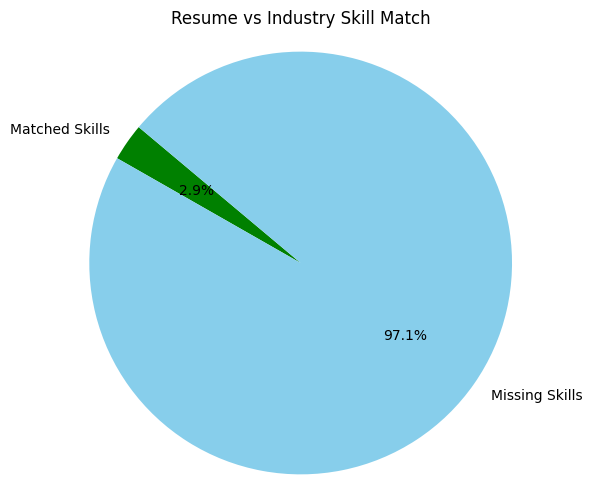

In [44]:
labels = ['Matched Skills', 'Missing Skills']
sizes = [len(matching_skills), len(missing_skills)]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'skyblue'])
plt.title('Resume vs Industry Skill Match')
plt.axis('equal')
plt.show()


# Beam Search

In [45]:
import heapq
import pandas as pd

# Define AI-related keywords
ai_keywords = [
    "nlp", "natural language processing", "software developer", "software engineer",
    "artificial intelligence", "machine learning", "deep learning", "data science",
    "neural networks", "python", "computer vision", "ai", "ml", "dl"
]

# Preprocess text for case-insensitive comparison
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    return text.lower()

# Heuristic: count how many keywords are found in the job text
def heuristic(text):
    text = preprocess_text(text)
    return sum(1 for kw in ai_keywords if kw in text)

# Beam Search for selecting top AI-related jobs
def beam_search(df, text_columns, beam_width=50, top_n=50):
    # The beam is a list of candidate tuples: (score, index)
    beam = []

    # Iterate over all rows in the DataFrame
    for index, row in df.iterrows():
        # Combine text from specified columns
        combined_text = " ".join(str(row[col]) for col in text_columns if pd.notnull(row[col]))
        score = heuristic(combined_text)
        if score > 0:
            candidate = (score, index)
            # Add candidate to the beam if beam is not full
            if len(beam) < beam_width:
                heapq.heappush(beam, candidate)  # using min-heap (by score)
            else:
                # If the current candidate's score is better than the smallest in the beam, replace it
                if candidate[0] > beam[0][0]:
                    heapq.heapreplace(beam, candidate)

    # Extract the indices from the beam and sort by score in descending order
    top_candidates = sorted(beam, key=lambda x: x[0], reverse=True)[:top_n]
    top_indices = [idx for score, idx in top_candidates]

    return df.loc[top_indices].reset_index(drop=True)

# Choose which columns to search through
text_columns = ["jobpost", "Title", "JobDescription", "JobRequirment", "RequiredQual"]

# Load your DataFrame (assuming df is already loaded)
# df = pd.read_csv('/mnt/data/Sample Datasets-2 data job posts.csv')

# Apply Beam Search
ai_jobs_df_beam = beam_search(df, text_columns)

print("Beam Search selected AI-related job postings:")
print(ai_jobs_df_beam[["Title", "Company", "JobDescription", "RequiredQual"]].head())


Beam Search selected AI-related job postings:
                               Title                Company  \
0    Quality Assurance Group Manager            UNICAD CJSC   
1                 Software Developer  Firmplace Corporation   
2  Quality Assurance Senior Engineer            UNICAD CJSC   
3                 Software Developer                 Zenteq   
4          Senior Software Developer  Firmplace Corporation   

                                      JobDescription  \
0  The individual will be responsible for design,...   
1  The Software Developers will be engaged in Win...   
2  The individual will be responsible for design,...   
3  The position assumes participation in the full...   
4  The Senior Software Developer will be engaged ...   

                                        RequiredQual  
0  - Must have BS/MS/PhD in CS/EE.\r\n- Preferred...  
1  - BS or MS in Computer Science or related fiel...  
2  - Must have BS/MS/PhD in CS/EE.\r\n- Preferred...  
3  Applicants shou

### Extract Relevant Information (Title, Company, Required Skills, Qualifications) - BEAM Search

In [46]:
# Select only important columns for analysis
selected_columns = [
    "Title", "Company", "Location", "JobDescription",
    "JobRequirment", "RequiredQual", "ApplicationP", "IT"
]

ai_jobs_df_beam_summary = ai_jobs_df_beam[selected_columns]

# Display total number of matched AI-related jobs
print(f"\n Number of AI-related job postings found: {len(ai_jobs_df_beam_summary)}")

# Show the first few rows as a summary
print("\n Summary of AI-Related Job Postings:")
display(ai_jobs_df_beam_summary.head(10))  # Change number as needed


 Number of AI-related job postings found: 50

 Summary of AI-Related Job Postings:


Title  \
0                    Quality Assurance Group Manager   
1                                 Software Developer   
2                  Quality Assurance Senior Engineer   
3                                 Software Developer   
4                          Senior Software Developer   
5             Engineer, Quality Assurance Department   
6                         Quality Assurance Engineer   
7  Senior Software Engineer for Content Managemen...   
8                                 Software Developer   
9                           Senior Software Engineer   

                                    Company          Location  \
0                               UNICAD CJSC  Yerevan, Armenia   
1                     Firmplace Corporation  Yerevan, Armenia   
2                               UNICAD CJSC  Yerevan, Armenia   
3                                    Zenteq  Yerevan, Armenia   
4                     Firmplace Corporation  Yerevan, Armenia   
5                                    UniCAD  Yerevan, Armenia   
6                               UNICAD CJSC  Yerevan, Armenia   
7                         Ogma Applications  Yerevan, Armenia   
8                            Imagenomic LLC  Yerevan, Armenia   
9  Armenian Branch of the Sada Systems Inc.  Yerevan, Armenia   

                                      JobDescription  \
0  The individual will be responsible for design,...   
1  The Software Developers will be engaged in Win...   
2  The individual will be responsible for design,...   
3  The position assumes participation in the full...   
4  The Senior Software Developer will be engaged ...   
5  Quality Assurance Department Engineer will be\...   
6  The individual will be responsible for design,...   
7  The Company is seeking a well experienced indi...   
8  Imagenomic LLC is looking for a Software Devel...   
9  The Senior Software Engineer will work under g...   

                                       JobRequirment  \
0  - The individual will be responsible for desig...   
1  - Work as a part of team on Web and Windows ap...   
2  Responsible for design, development, applicati...   
3  We expect a successful candidate to be able to...   
4  - Work as a part of team on Web and Windows ap...   
5  - Design, development, appliance, and maintena...   
6  Responsible for design, development, applicati...   
7  - Work as Project Manager to get aligned with ...   
8  - Professionally and effectively carry out sof...   
9  - Write C#, VB and JavaScript code (using .NET...   

                                        RequiredQual  \
0  - Must have BS/MS/PhD in CS/EE.\r\n- Preferred...   
1  - BS or MS in Computer Science or related fiel...   
2  - Must have BS/MS/PhD in CS/EE.\r\n- Preferred...   
3  Applicants should have exposure to and\r\nprev...   
4  - BS or MS in Computer Science or related fiel...   
5  - Bachelor or Master of Science (Computer scie...   
6  Must have BS/MS in CS/EE.\r\nSKILLS/KNOWLEDGE:...   
7  - Minimum 4 years of extensive development exp...   
8  - Bachelor's degree in Computer Science or clo...   
9  - At least 4 years of work experience in Web a...   

                                        ApplicationP     IT  
0  Send a cover letter and CV in Plain text, MS\r...  False  
1  All interested candidates should submit their\...   True  
2  Send a cover letter and CV in Plain text, MS\r...  False  
3  Send your cover letter and curriculum vitae to...   True  
4  All interested candidates should submit their\...   True  
5  Please, send your resume and cover letter tojo...  False  
6  Send a cover letter and CV in Plain text, MS\r...   True  
7  To apply, please e-mail your CV to:hbaghdas@.....   True  
8  Please send your resume in English to:mail@......   True  
9  To apply, please send your resumes to:techjobs...   True

Analysis & Insights Extraction - Beam Search

In [47]:
# Count how many AI-related posts come from each company.
company_counts = ai_jobs_df_beam['Company'].value_counts()
print("\nJob Post Counts by Company in AI-Related Roles:")
print(company_counts)


Job Post Counts by Company in AI-Related Roles:
Company
Ogma Applications CJSC                              6
Netsoft-USA Yerevan Office                          4
APG Armenia                                         4
UNICAD CJSC                                         3
VXSoft Ltd                                          3
Ogma Applications                                   2
Imagenomic LLC                                      2
K-Telecom CJSC (VivaCell-MTS)                       2
UniCAD                                              2
Firmplace Corporation                               2
Career Center Partner Company                       1
Zenteq                                              1
Armenian Branch of the Sada Systems Inc.            1
Zenteq.am                                           1
ZenteX.AM                                           1
Innova Systems                                      1
Impeva Labs                                         1
Netsoft USA Yerevan Offic

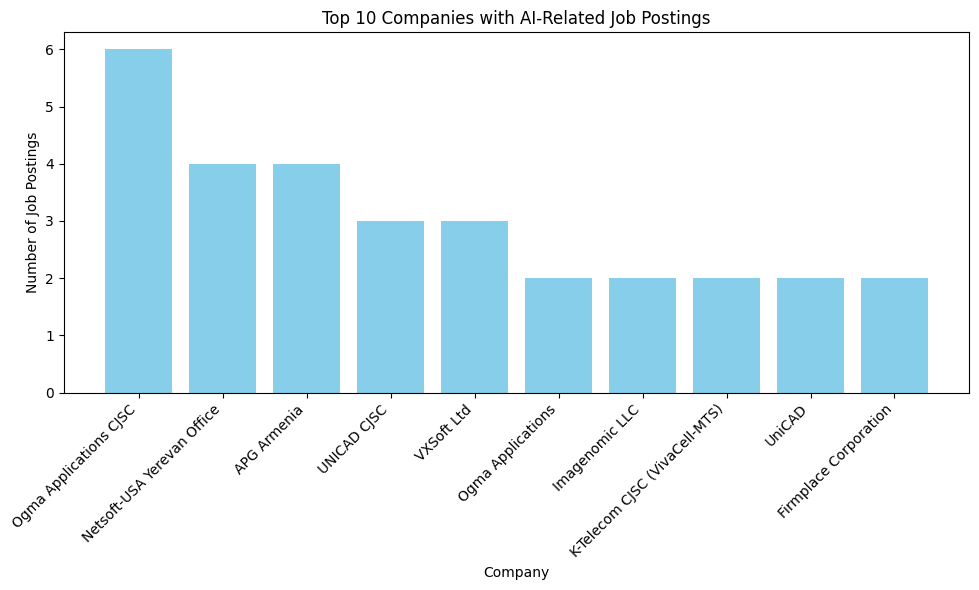

In [48]:
company_counts = ai_jobs_df_beam['Company'].value_counts()

# Select the top N companies for visualization (e.g., top 10)
top_n = 10  # You can adjust this
top_companies = company_counts.head(top_n)

# Create the bar chart using matplotlib.pyplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(top_companies.index, top_companies.values, color='skyblue')
plt.title(f'Top {top_n} Companies with AI-Related Job Postings')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [49]:
# Step 2: Extract insights - common titles, companies, locations, and qualification patterns
top_titles = ai_jobs_df_beam["Title"].value_counts().head(5)
top_companies = ai_jobs_df_beam["Company"].value_counts().head(5)
top_locations = ai_jobs_df_beam["Location"].value_counts().head(5)

# Collect common phrases from qualifications
all_quals = " ".join(str(q) for q in ai_jobs_df["RequiredQual"] if pd.notnull(q))
qual_phrases = re.split(r"[-•\n\r;:]", all_quals)
qual_cleaned = [q.strip() for q in qual_phrases if len(q.strip()) > 5]
qual_counter = Counter(qual_cleaned).most_common(10)

# Collect common phrases from requirements
all_requirements = " ".join(str(q) for q in ai_jobs_df["JobRequirment"] if pd.notnull(q))
requirement_phrases = re.split(r"[-•\n\r;:]", all_requirements)
requirement_cleaned = [q.strip() for q in requirement_phrases if len(q.strip()) > 5]
requirement_counter = Counter(requirement_cleaned).most_common(10)


# Step 3: Display insights
print("Top Job Titles in AI-related Roles:")
print(top_titles)

print("\nMost Common Qualification Phrases:")
for phrase, count in qual_counter:
    print(f"{phrase} ({count})")

print("\nMost Common Job Requirement Phrases:")
for phrase, count in requirement_counter:
    print(f"{phrase} ({count})")

Top Job Titles in AI-related Roles:
Title
Software Developer           9
Senior Software Engineer     7
Software Engineer            5
C++ Software Developer       2
Senior Software Developer    2
Name: count, dtype: int64

Most Common Qualification Phrases:
methodologies and knowledge of complete product development life cycle (7)
Familiarity with the .NET Framework, specifically the following (7)
packages (7)
messaging, threading, generic collections, custom controls and (7)
Extensive programming experience with standard management and (7)
Thorough understanding of software development processes and (7)
Ability to work under pressure (6)
applications (6)
of ASP.NET (6)
instrumentation API's (6)

Most Common Job Requirement Phrases:
Design, proto (8)
Work with the Senior Architect in the US to get aligned with product (7)
roadmaps and assume a key role in the development of these products (6)
Work with the Quality Assurance team to develop and maintain unit tests (6)
based on product 

### Selecting 3 Jobs - filtered by Beam Search

In [50]:
# Score jobs and select top 3 with complete info
def select_top_ai_jobs(df, text_columns, top_n=3):
    scored = []
    for idx, row in df.iterrows():
        text = " ".join(str(row[col]) for col in text_columns if pd.notnull(row[col]))
        score = heuristic(text)
        if pd.notnull(row["JobRequirment"]) and pd.notnull(row["RequiredQual"]):
            scored.append((score, idx))
    # Sort by score descending and get top_n
    top_scored = sorted(scored, key=lambda x: -x[0])[:top_n]
    selected_indices = [idx for _, idx in top_scored]
    return df.loc[selected_indices]

# Select 3 best AI job postings
selected_jobs_beam = select_top_ai_jobs(ai_jobs_df_beam, text_columns)

# Show selected job details
display(selected_jobs_beam[["Title", "Company", "Location", "JobDescription", "JobRequirment", "RequiredQual", "IT"]])

Title                Company          Location  \
0    Quality Assurance Group Manager            UNICAD CJSC  Yerevan, Armenia   
1                 Software Developer  Firmplace Corporation  Yerevan, Armenia   
2  Quality Assurance Senior Engineer            UNICAD CJSC  Yerevan, Armenia   

                                      JobDescription  \
0  The individual will be responsible for design,...   
1  The Software Developers will be engaged in Win...   
2  The individual will be responsible for design,...   

                                       JobRequirment  \
0  - The individual will be responsible for desig...   
1  - Work as a part of team on Web and Windows ap...   
2  Responsible for design, development, applicati...   

                                        RequiredQual     IT  
0  - Must have BS/MS/PhD in CS/EE.\r\n- Preferred...  False  
1  - BS or MS in Computer Science or related fiel...   True  
2  - Must have BS/MS/PhD in CS/EE.\r\n- Preferred...  False

### Top Keywords Matched by Each Selected Job - Beam Search

In [51]:
# Function to count how many AI keywords match in a given text
def keyword_match_counts(text):
    text = preprocess_text(text)
    return {kw: int(kw.lower() in text) for kw in ai_keywords}

# Apply keyword matching to each selected job
for i, row in selected_jobs_beam.iterrows():
    print(f"\n=== Job {i+1}: {row['Title']} at {row['Company']} ===")
    combined_text = " ".join([
        str(row["Title"]),
        str(row["JobRequirment"]),
        str(row["RequiredQual"])
    ])
    matches = keyword_match_counts(combined_text)
    matched_keywords = [kw for kw, found in matches.items() if found]
    print("Matched Keywords:", matched_keywords)


=== Job 1: Quality Assurance Group Manager at UNICAD CJSC ===
Matched Keywords: ['python', 'ai', 'ml']

=== Job 2: Software Developer at Firmplace Corporation ===
Matched Keywords: ['software developer', 'software engineer', 'ml']

=== Job 3: Quality Assurance Senior Engineer at UNICAD CJSC ===
Matched Keywords: ['python', 'ai', 'ml']


### Visualize required skills using word clouds - Convert Text to Word Clouds (Visual Insight) - Beam Search

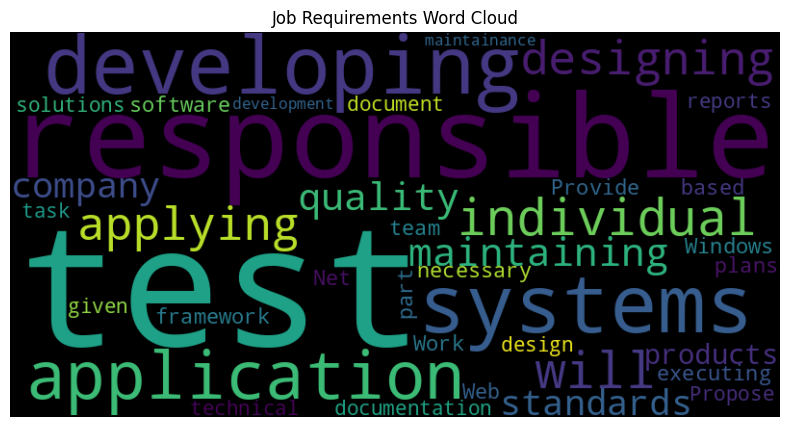

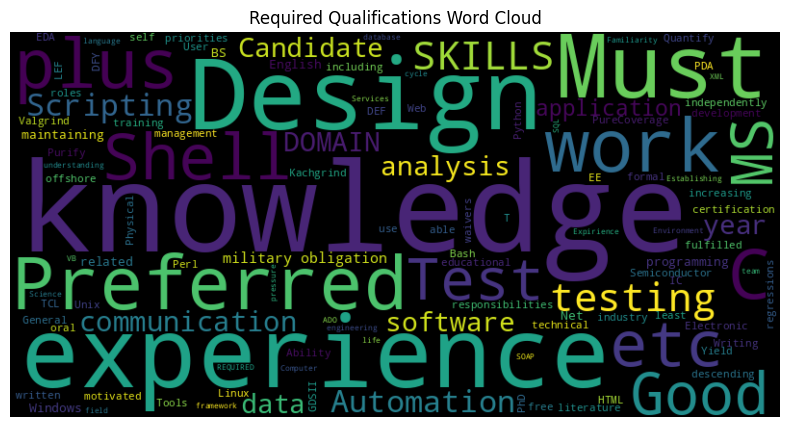

In [52]:
all_requirements = " ".join(selected_jobs_beam["JobRequirment"].dropna())
all_qualifications = " ".join(selected_jobs_beam["RequiredQual"].dropna())

# Word cloud for job requirements
wordcloud_req = WordCloud(width=800, height=400).generate(all_requirements)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_req, interpolation='bilinear')
plt.axis("off")
plt.title("Job Requirements Word Cloud")
plt.show()

# Word cloud for qualifications
wordcloud_qual = WordCloud(width=800, height=400).generate(all_qualifications)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_qual, interpolation='bilinear')
plt.axis("off")
plt.title("Required Qualifications Word Cloud")
plt.show()